
#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Postpaid: Customer inform beforehand Prepaid: Customer stop using services and it is difficult to know whether someone has churned or has temporarily stopped using services

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.
#### Churn definition:

- Revenue based churn: Customers who dont generate any revenue by using the services offered
- Usage based churn: Customers who dont use any services over a period of time. Defining the period might be tricky

In this project, you will use the usage-based definition to define churn.
#### High Value churn:

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metrics and predict churn only on high-value customers.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
#### 3 Phases of Customer lifecycle with operator:

- Good -> Customer is happy with services
- Action -> Customer gets good offer from competitor, unhappy with services of current. Customer behavior begins to change. Identification of churn-probable customers needs to be done in this phase and corrective action needs to be taken.
- Churn -> Customer is said ot be churned.

Churn is defined based on this phase. At time of prediction, this data is not available. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

##### High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).



In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
import time

In [2]:
# import data
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# check the datatype in churn_data
churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [4]:
# check the numeric column in data
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### check no of columns of each data type


There are id columns (`mobile number` & `circle id`) and `date columns` which are not going to use in model building. We can simply drop these columns

In [5]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn_data.columns if column not in id_cols + date_cols + cat_cols]

In [6]:
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn_data.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Check the missing value percentage in each columns -

In [7]:
churn_data.isnull().sum()*100/churn_data.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## Impute missing values

## i) Filter all the recharge columns

In [8]:
churn_data.filter(regex='rech',axis=1).describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


we noticed few recharge columns have minimum recharge value as 0.5 or 1. We will check all these columns

In [9]:
churn_data.loc[churn_data.total_rech_data_6.isnull() & churn_data.date_of_last_rech_data_6.isnull(),["total_rech_data_6", "date_of_last_rech_data_6"]]

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
99991,NaN,NaN
99992,NaN,NaN
99993,NaN,NaN
99994,NaN,NaN


In the recharge variables where minumum value is 1 or 0.5, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [10]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [11]:
# impute missing values with 0
churn_data[zero_impute] = churn_data[zero_impute].apply(lambda x: x.fillna(0))

In [12]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn_data[zero_impute].isnull().sum()*100/churn_data.shape[1])

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [13]:
# drop id and date columns
print("Shape before dropping: ", churn_data.shape)
churn_data = churn_data.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn_data.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


## ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [14]:
# replace missing values with '-1' in categorical columns
churn_data[cat_cols] = churn_data[cat_cols].apply(lambda x: x.fillna(-1))

In [15]:
# check missing value ratio in cat columns
print("Missing value ratio:\n")
print(churn_data[cat_cols].isnull().sum()*100/churn_data.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [16]:
#Check missing values percentage in all the columns of application data
all_columns = (churn_data.isnull().sum()/len(churn_data)*100).reset_index()
all_columns.rename(columns = {'index':'Missing Columns', 0:'Missing Values'}, inplace=True)
all_columns.sort_values(by='Missing Values',ascending=False, inplace = True)

In [17]:
all_columns

,Missing Columns,Missing Values
175,arpu_3g_6,74.846748
159,count_rech_3g_6,74.846748
155,count_rech_2g_6,74.846748
179,arpu_2g_6,74.846748
176,arpu_3g_7,74.428744
160,count_rech_3g_7,74.428744
156,count_rech_2g_7,74.428744
180,arpu_2g_7,74.428744
162,count_rech_3g_9,74.077741
178,arpu_3g_9,74.077741


In [18]:
#Store the above data into dataframe for missing values >70% 
missing_column = list(all_columns[all_columns['Missing Values'] > 70]['Missing Columns'])

In [19]:
len(missing_column)

16

In [20]:
# Drop all 16 columns from churn data having more than 70% missing values
churn_data.drop(missing_column, axis=1, inplace = True)

In [21]:
#check the shape of churn data after droping all the columns having more than 70% missing values.
churn_data.shape

(99999, 196)

## iv) impute the missing value for categorical columns

In [22]:
# Check the missing values in categorical columns
churn_data[cat_cols].isnull().sum()*100/churn_data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

## v) impute the missing value for numerical columns

In [23]:
# Check all numerical column
num_cols1 = [column for column in churn_data.columns if column not in cat_cols]

In [24]:
len(num_cols1)

188

In [25]:
# Check the missing values in the numnerical columns
churn_data[num_cols1].isnull().sum()*100/churn_data.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [26]:
# Imputing continuous variables with its median value

for i in num_cols1:
    churn_data[i]=churn_data[i].fillna(churn_data[i].median())

In [27]:
# verify percentage of missing values in numerical columns after imputation
churn_data[num_cols1].isnull().sum()*100/churn_data.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

## Filter high-value customers

In [28]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_data['total_data_rech_6'] = churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_data_rech_7'] = churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7

### Add total data recharge and total recharge to get total combined recharge amount for a month

In [29]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn_data['amt_data_6'] = churn_data.total_rech_amt_6 + churn_data.total_data_rech_6
churn_data['amt_data_7'] = churn_data.total_rech_amt_7 + churn_data.total_data_rech_7

In [30]:
# calculate average recharge done by customer in June and July
churn_data['av_amt_data_6_7'] = (churn_data.amt_data_6 + churn_data.amt_data_7)/2

In [31]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn_data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [32]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn_data.loc[churn_data.av_amt_data_6_7 >= churn_data.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 201)

In [33]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# Derive churn

In [34]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [35]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [36]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)


In [37]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [38]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

In [39]:
# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Derive New Features

In [40]:
# Average roaming minutes of usage across 3 months
churn_filtered['avg_roam_mou']= (churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7 + 
                               churn_filtered.roam_ic_mou_8 + churn_filtered.roam_og_mou_6 + 
                               churn_filtered.roam_og_mou_7 + churn_filtered.roam_og_mou_8)/3

In [41]:
# Change in average revenue per user from good phase to action phase
churn_filtered['%chg_in_arpu']=(((churn_filtered.arpu_8)-((churn_filtered.arpu_6+churn_filtered.arpu_7)/2))/
                                 ((churn_filtered.arpu_6+churn_filtered.arpu_7)/2))*100

churn_filtered[['arpu_6','arpu_7','arpu_8','%chg_in_arpu']].head(5)

,arpu_6,arpu_7,arpu_8,%chg_in_arpu
0,197.385,214.816,213.803,3.737254
1,1069.180,1349.850,3171.480,162.210886
2,378.721,492.223,137.362,-68.456755
3,514.453,597.753,637.760,14.683791
4,74.350,193.897,366.966,173.603060


In [42]:
# Change in recharge pattern from good phase to action phase
churn_filtered['%chg_in_rech_amt']=(((churn_filtered.total_rech_amt_8)-((churn_filtered.total_rech_amt_6+churn_filtered.total_rech_amt_7)/2))/
                                 ((churn_filtered.total_rech_amt_6+churn_filtered.total_rech_amt_7)/2))*100

### Check the null values again in all the columns

In [43]:
churn_filtered.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

%chg_in_rech_amt has one missing value, we will impute with median.

In [44]:
churn_filtered['%chg_in_rech_amt'] = churn_filtered['%chg_in_rech_amt'].fillna(churn_filtered['%chg_in_rech_amt'].median())

In [45]:
# Impute filtered data again for any type of missing or infinite value
churn_filtered =churn_filtered[~churn_filtered.isin([np.nan, np.inf, -np.inf]).any(1)]

# Data Visualization (Exploratory Data Analysis)

Data is clean now but before moving to prepare data for Model building, we will do some Exploratory data analysis to know the type of data present in dataset.

### Univariate Analysis - Numercial

In [46]:
# define function to generate box plot for all numerical variables
def plot_box(df, num_cols):
    sns.boxplot(y=df[num_cols])
    plt.title("Distribution of "+ num_cols)
    plt.show()

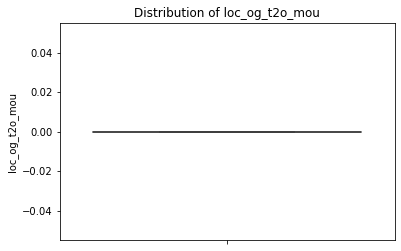

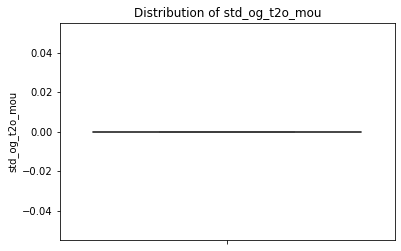

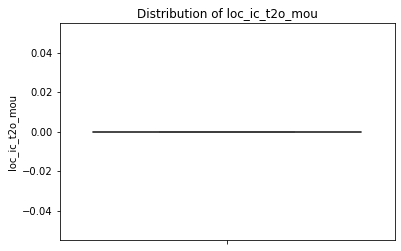

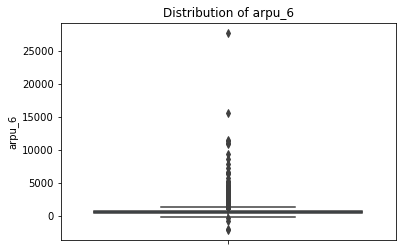

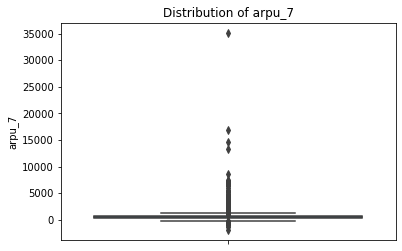

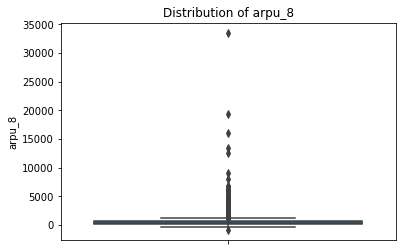

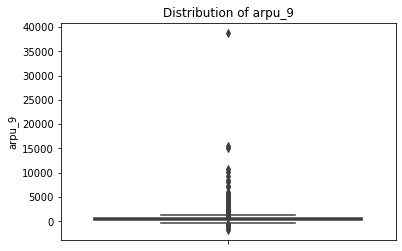

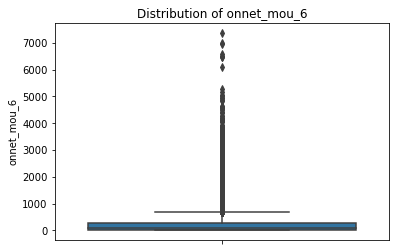

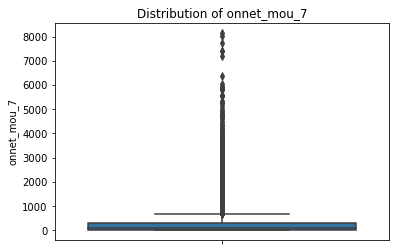

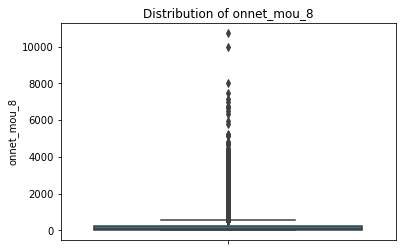

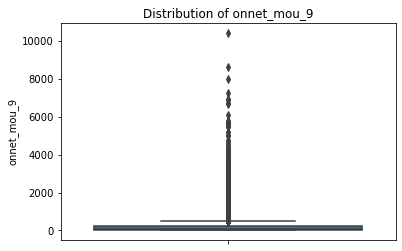

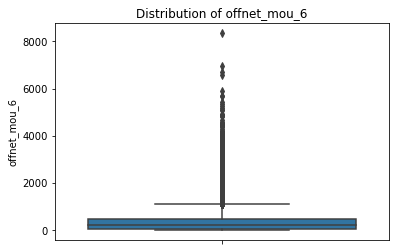

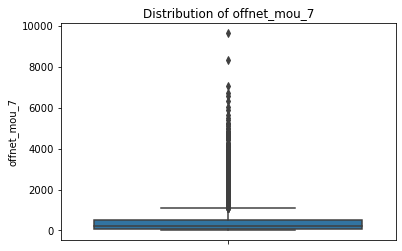

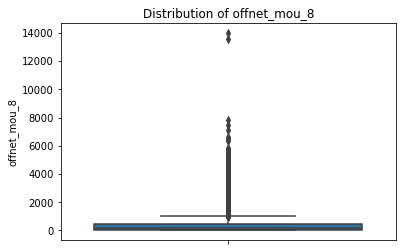

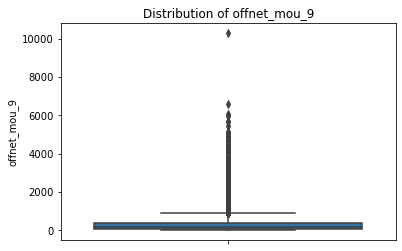

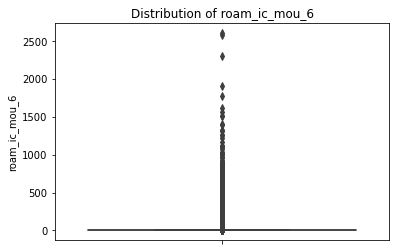

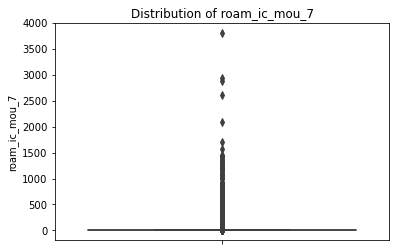

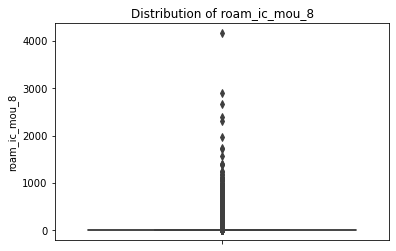

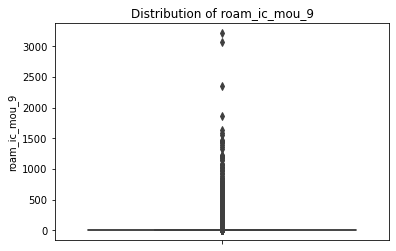

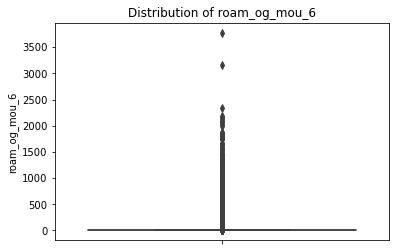

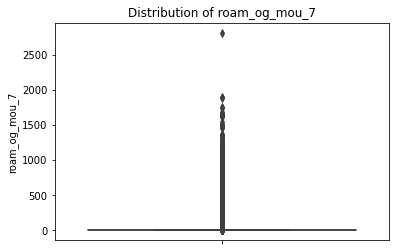

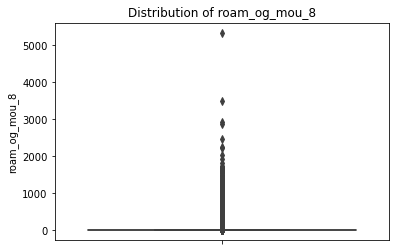

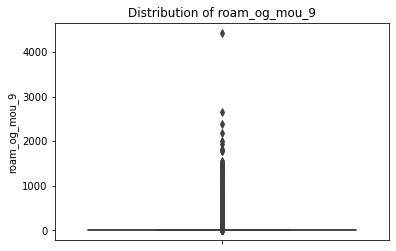

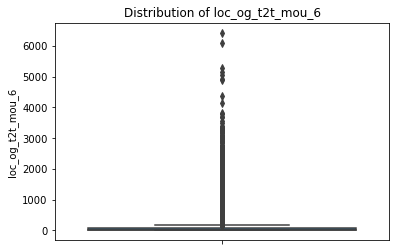

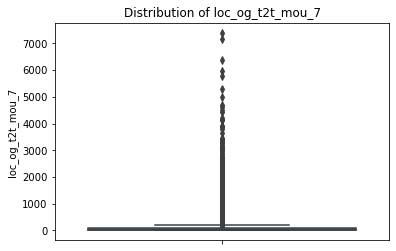

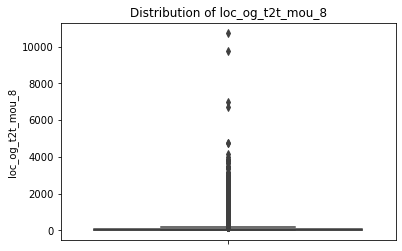

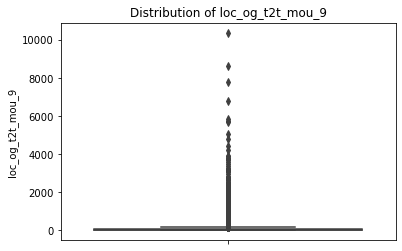

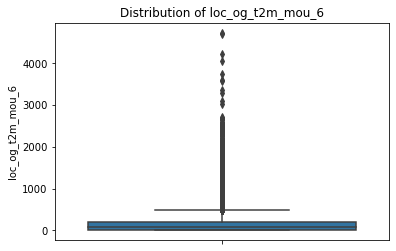

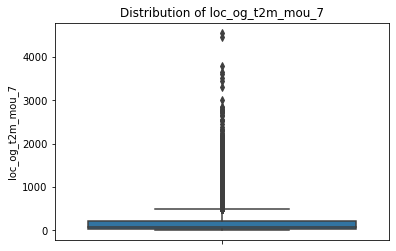

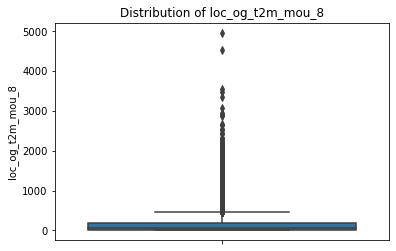

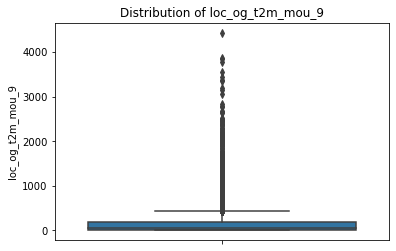

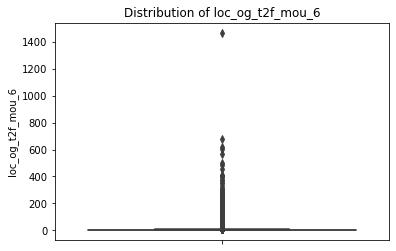

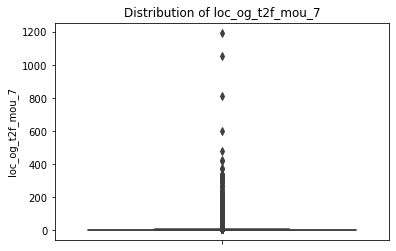

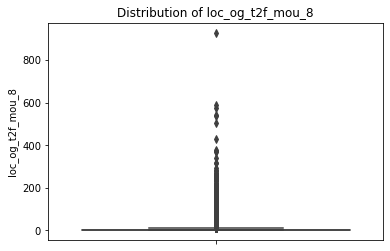

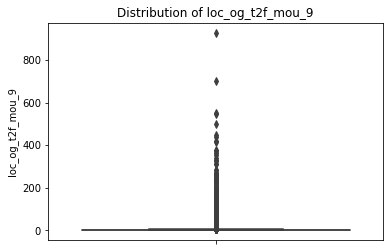

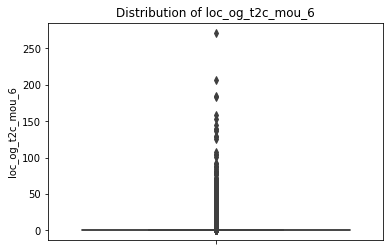

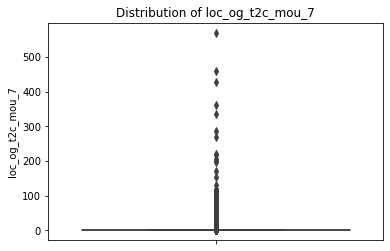

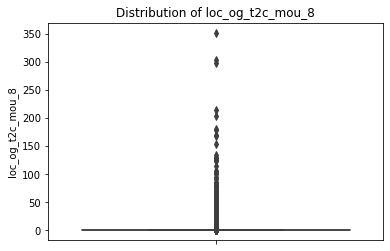

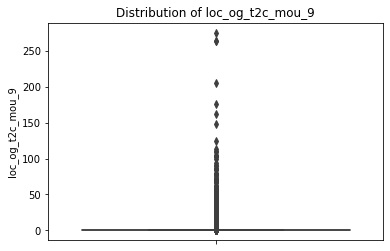

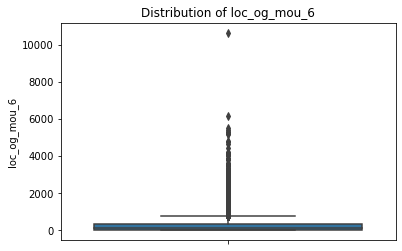

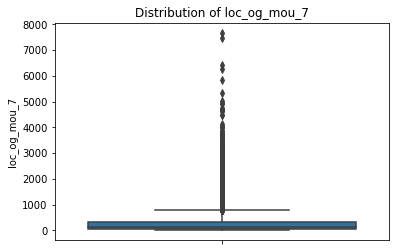

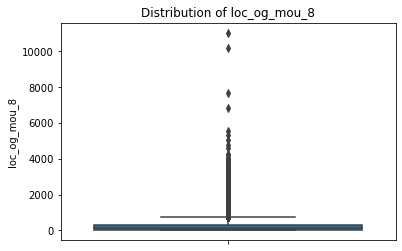

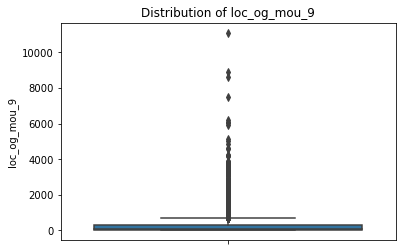

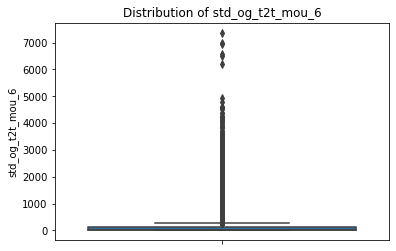

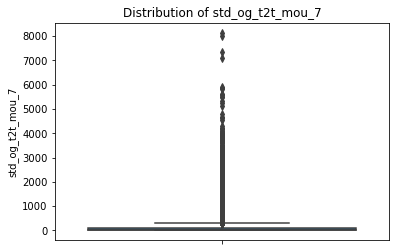

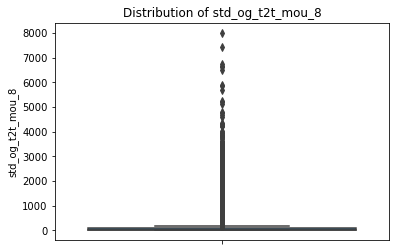

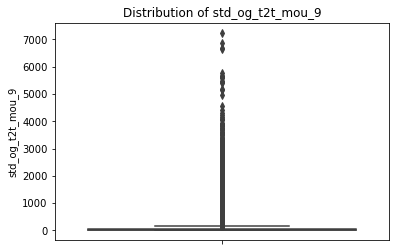

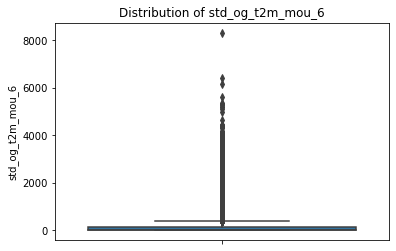

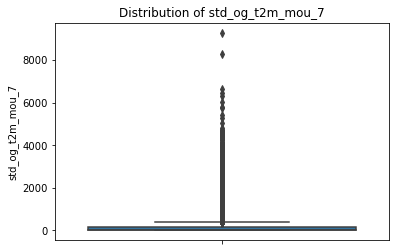

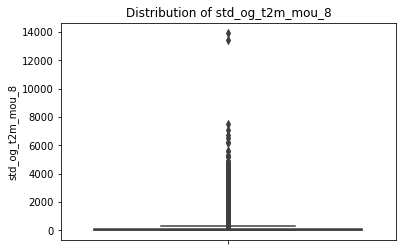

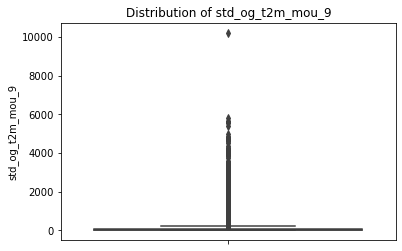

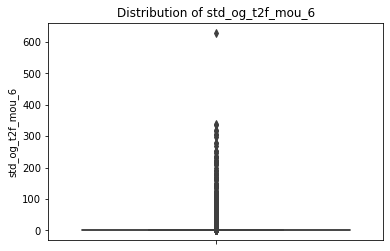

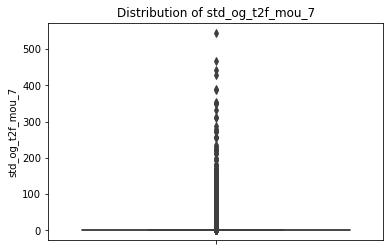

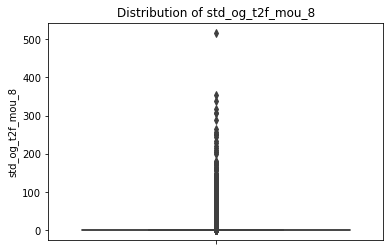

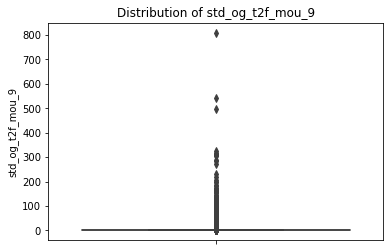

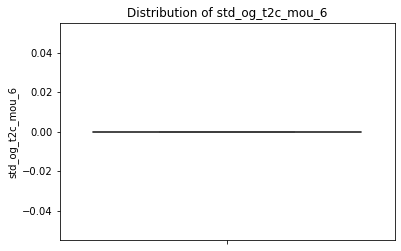

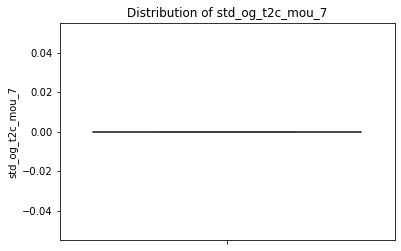

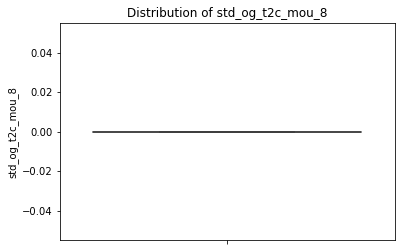

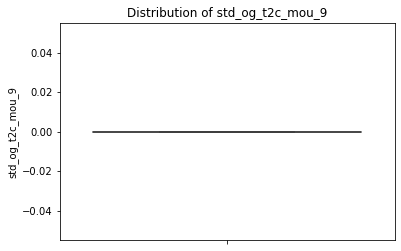

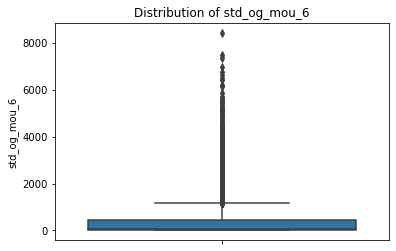

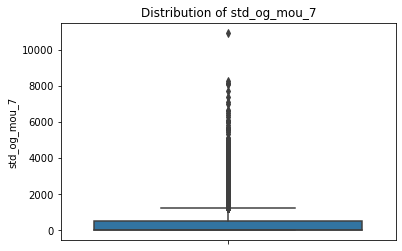

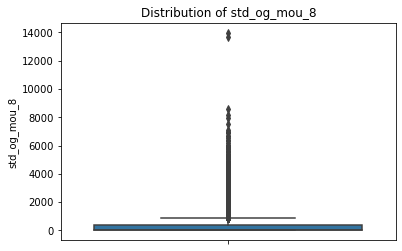

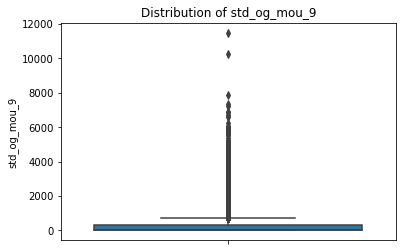

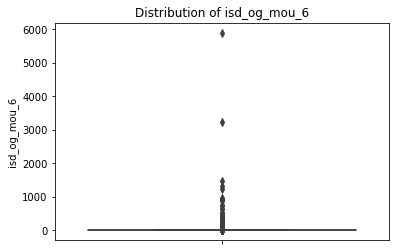

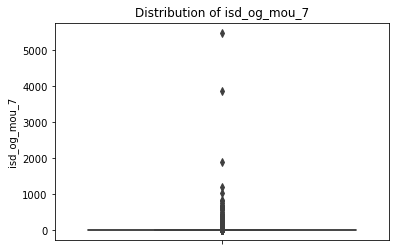

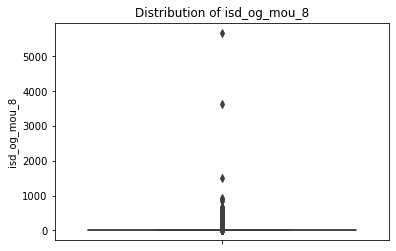

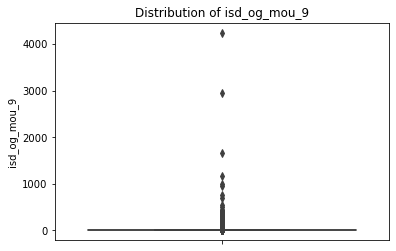

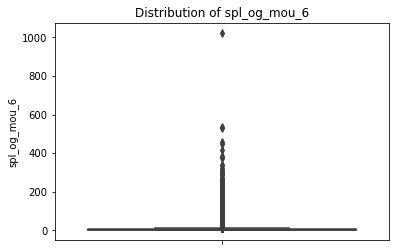

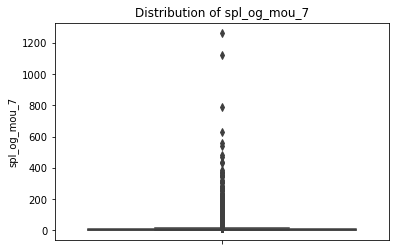

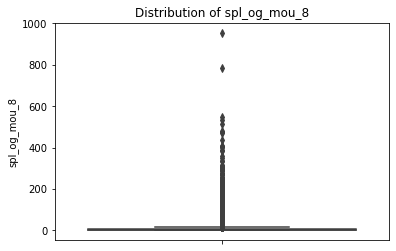

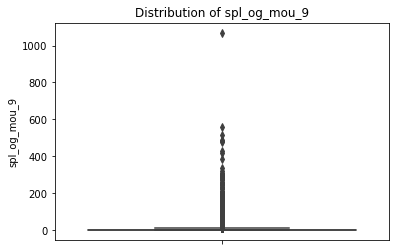

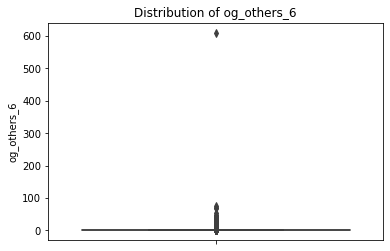

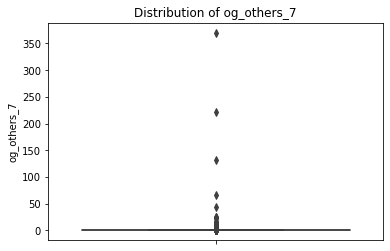

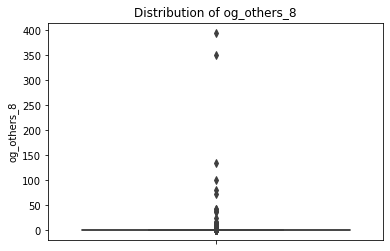

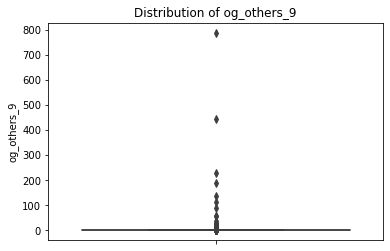

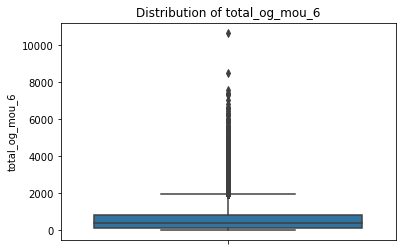

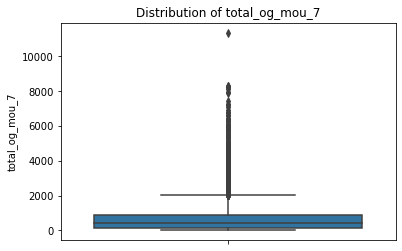

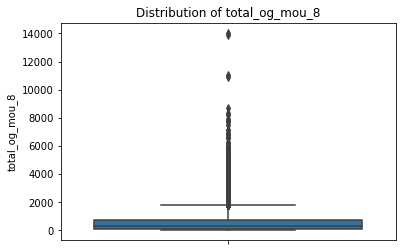

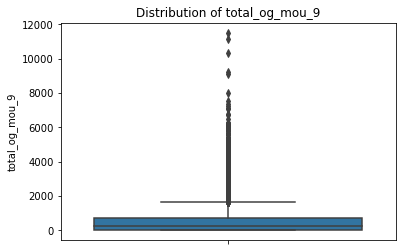

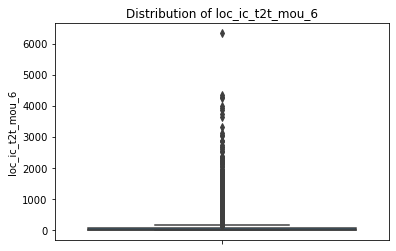

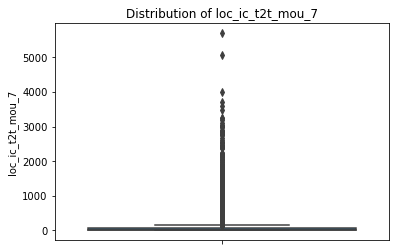

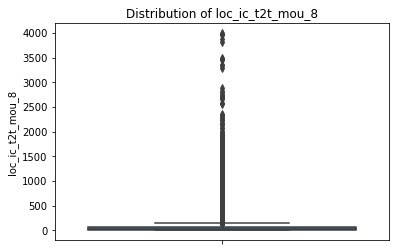

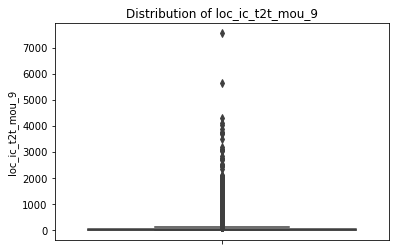

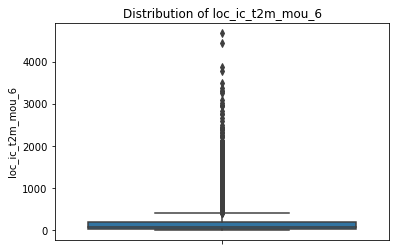

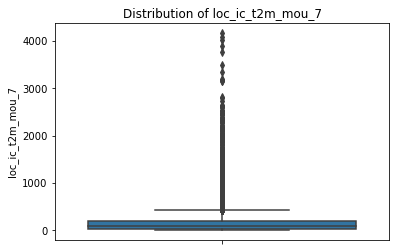

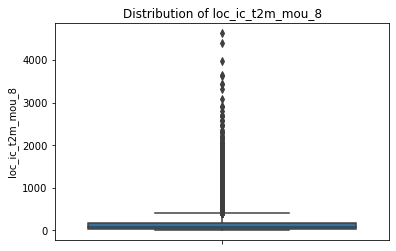

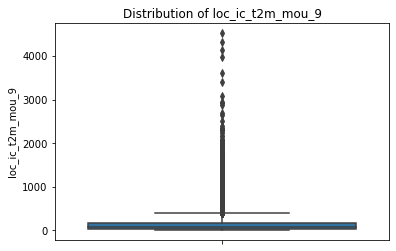

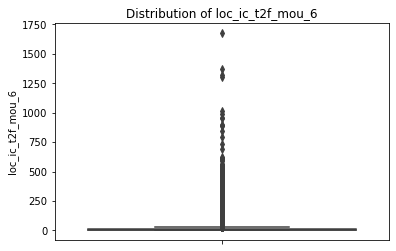

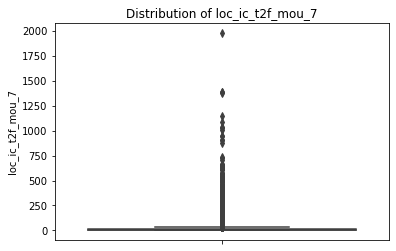

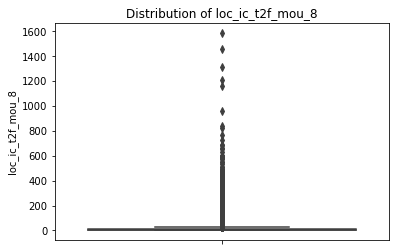

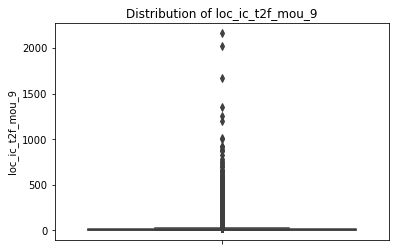

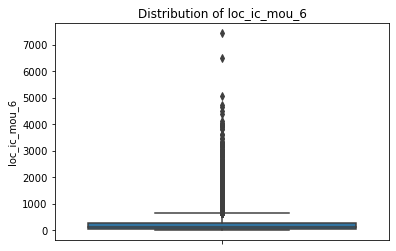

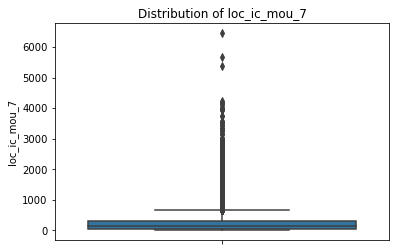

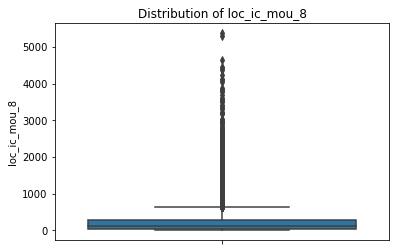

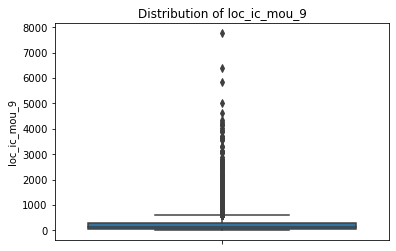

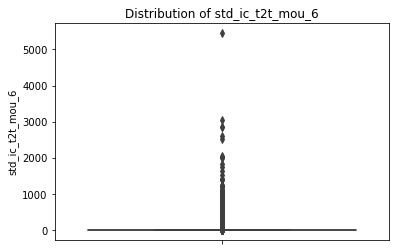

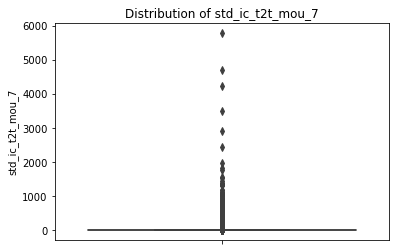

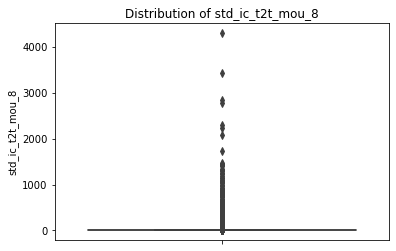

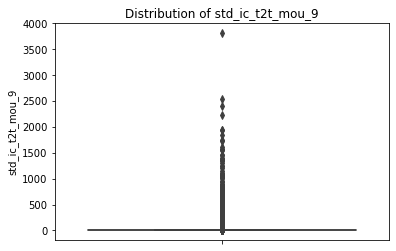

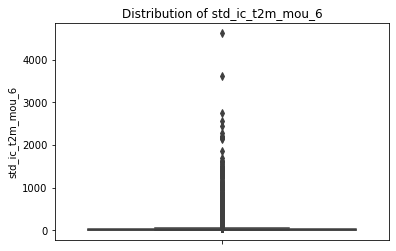

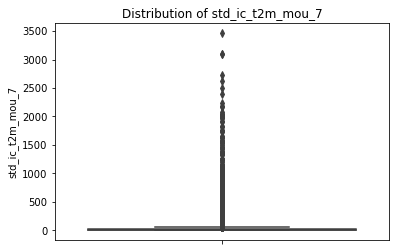

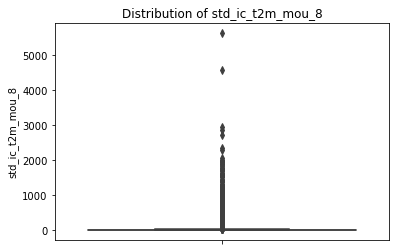

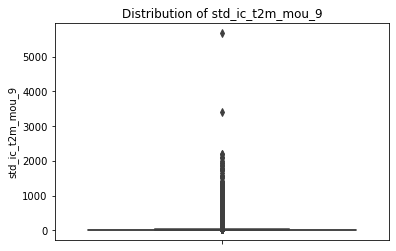

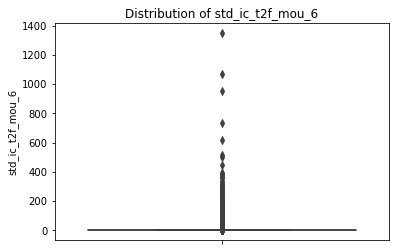

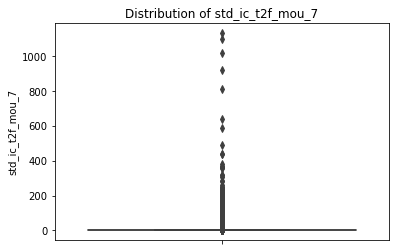

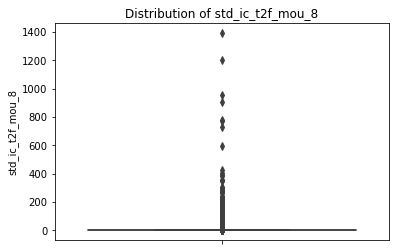

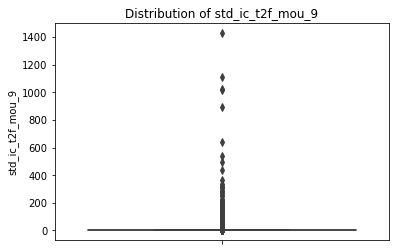

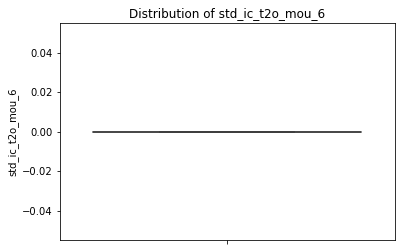

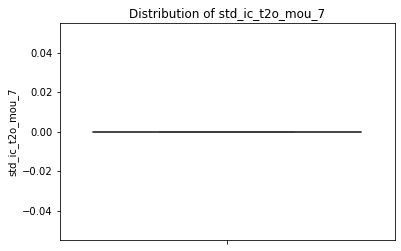

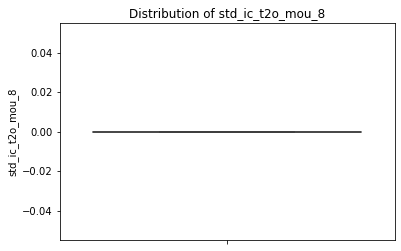

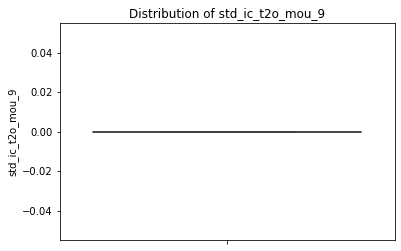

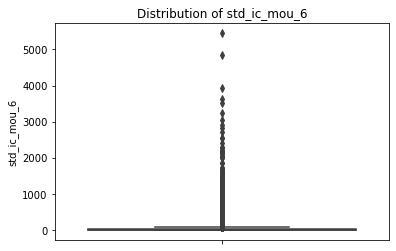

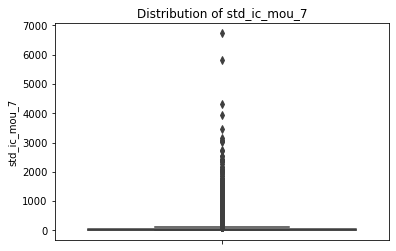

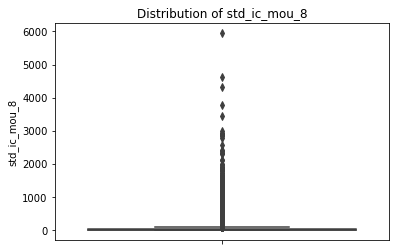

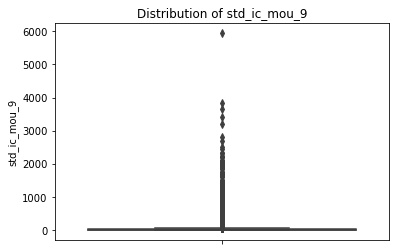

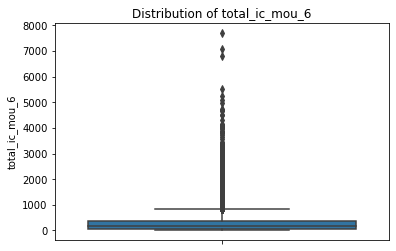

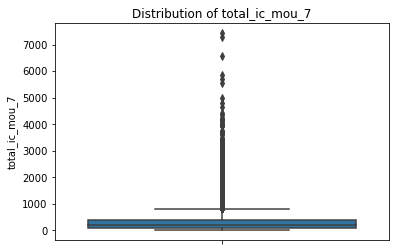

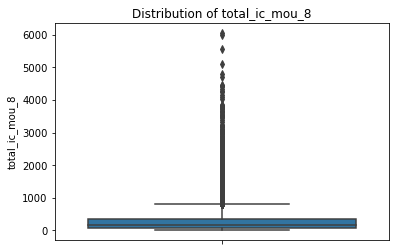

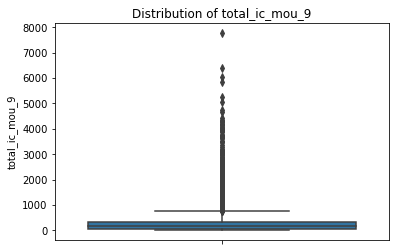

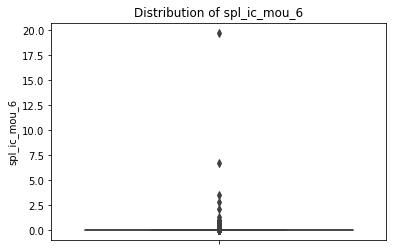

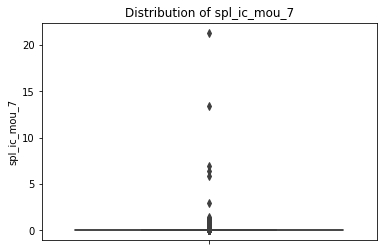

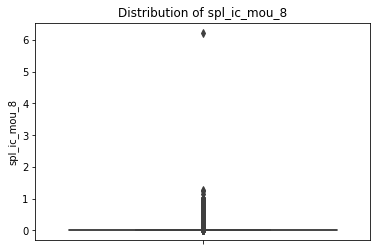

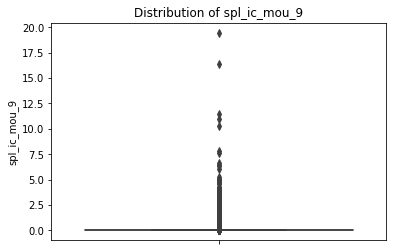

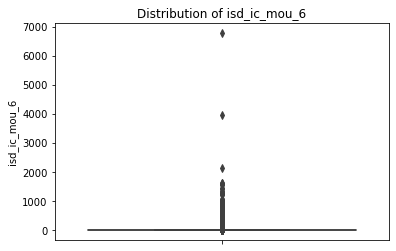

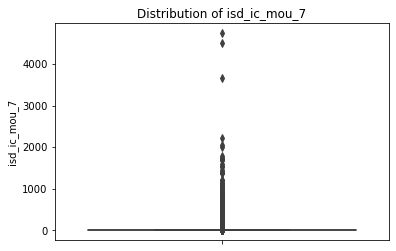

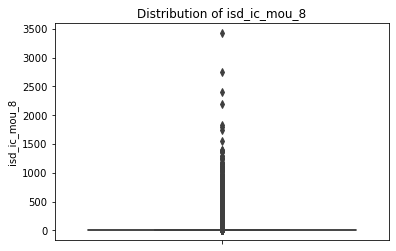

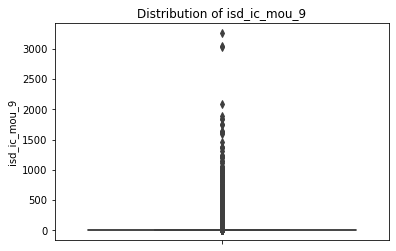

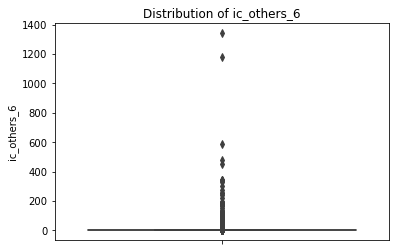

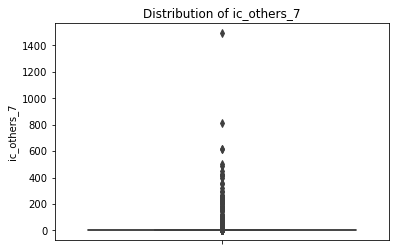

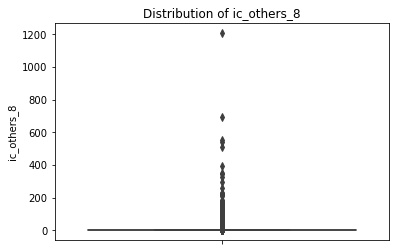

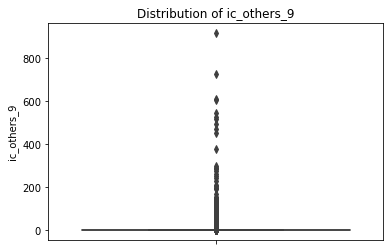

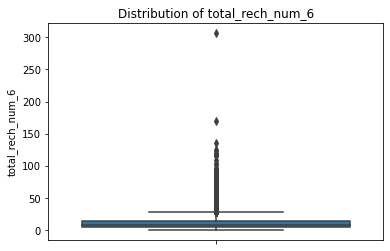

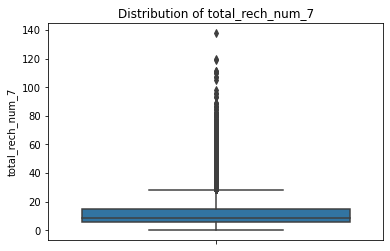

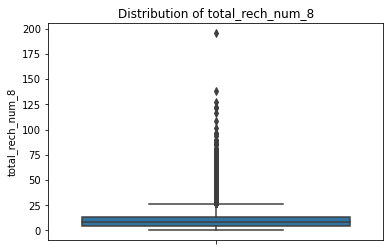

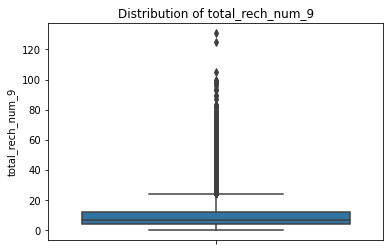

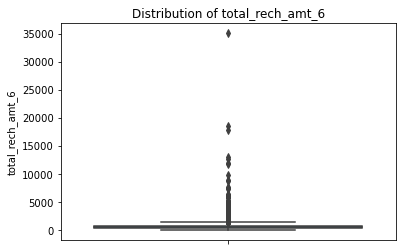

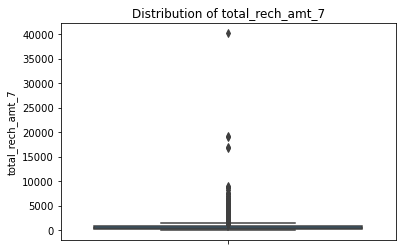

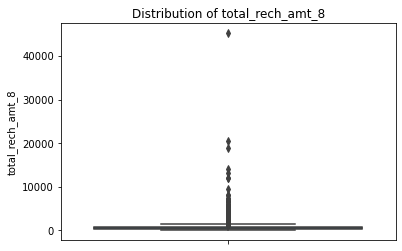

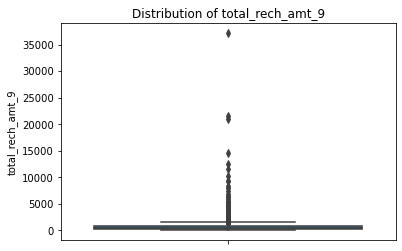

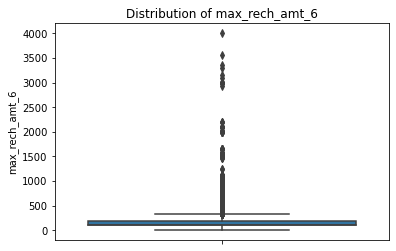

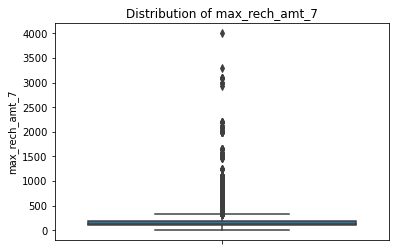

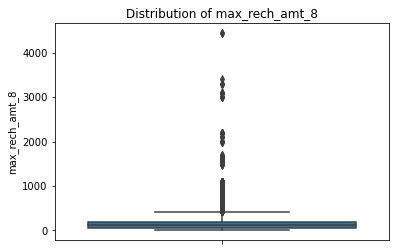

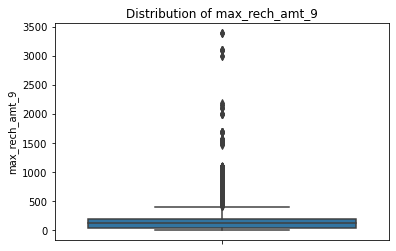

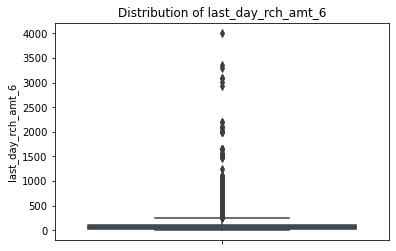

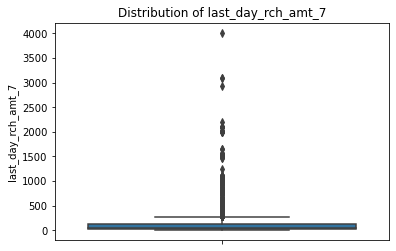

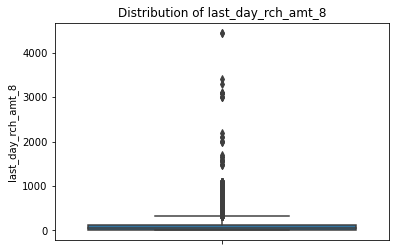

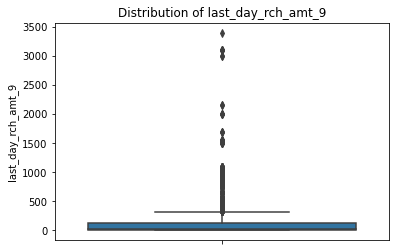

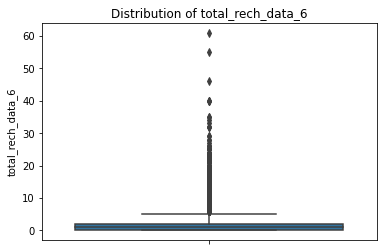

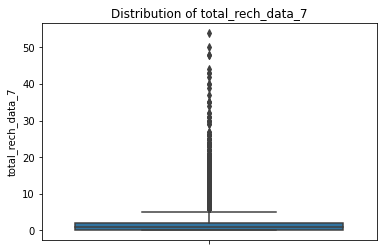

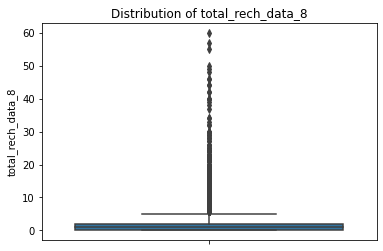

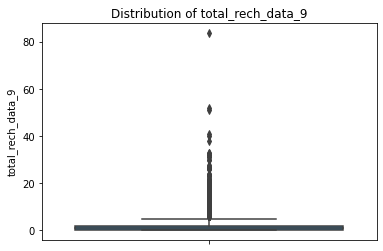

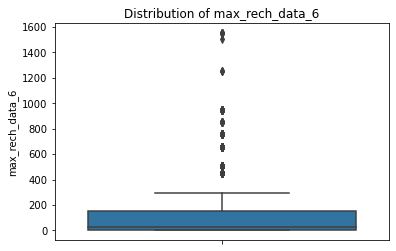

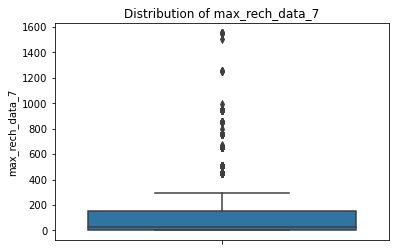

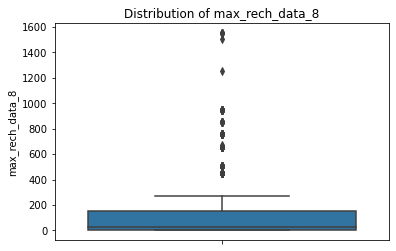

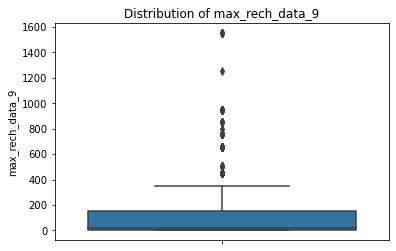

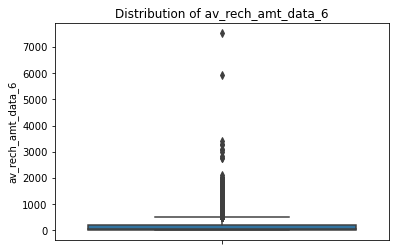

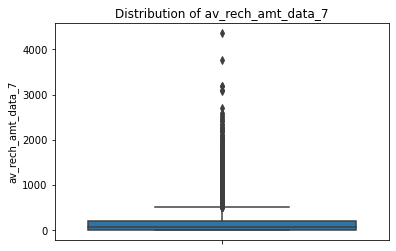

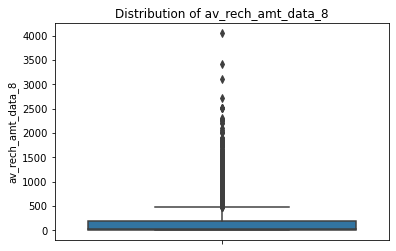

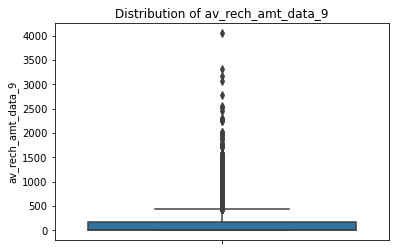

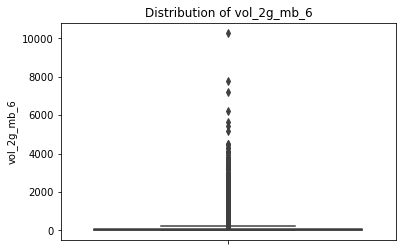

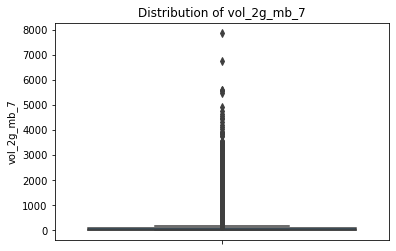

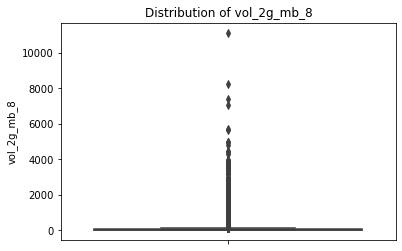

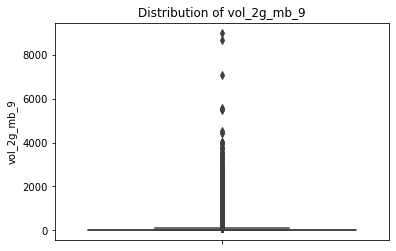

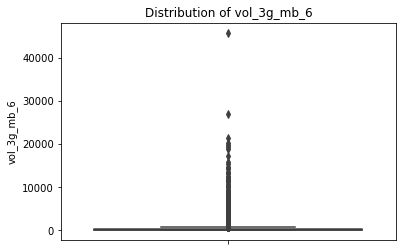

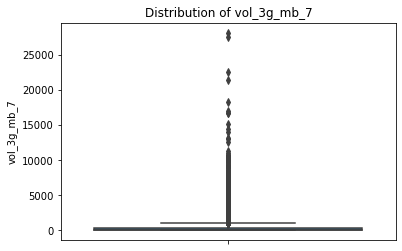

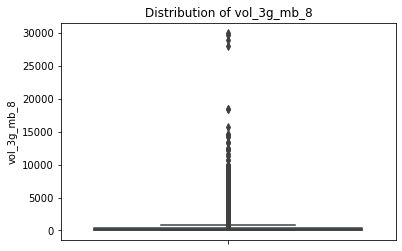

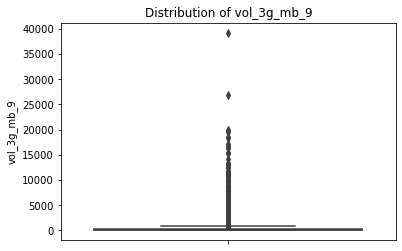

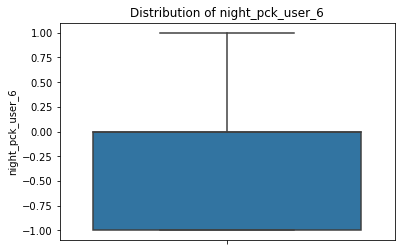

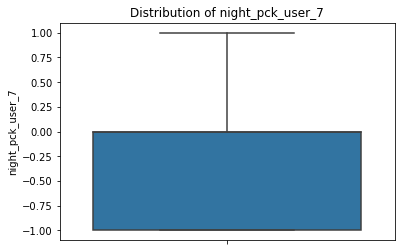

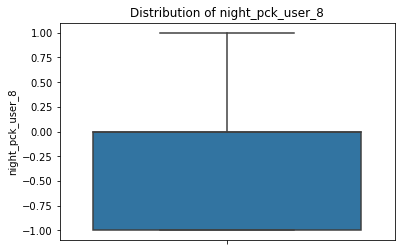

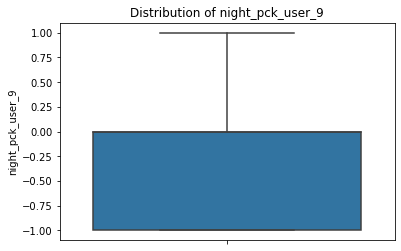

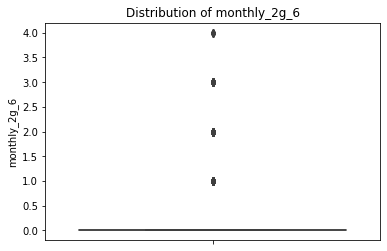

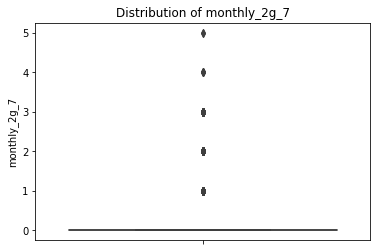

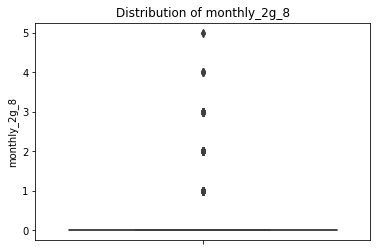

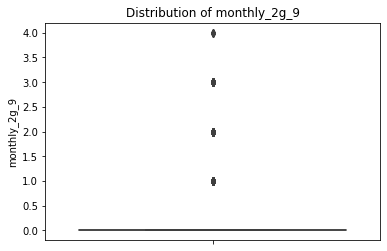

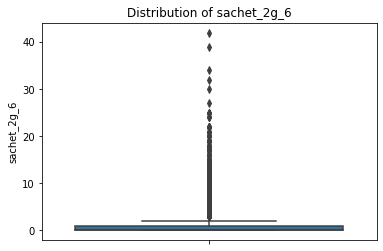

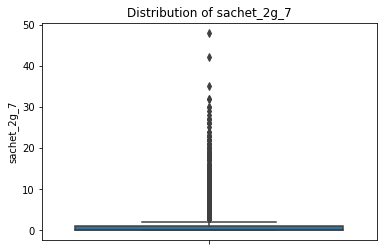

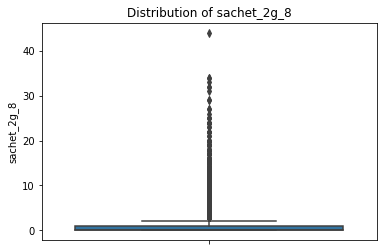

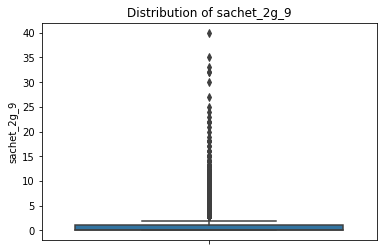

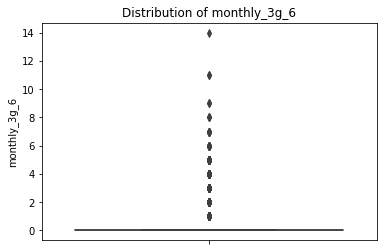

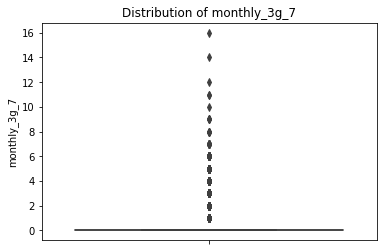

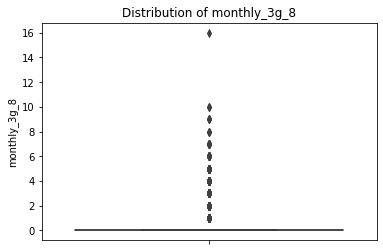

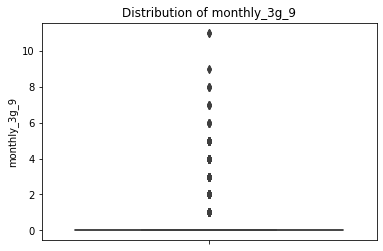

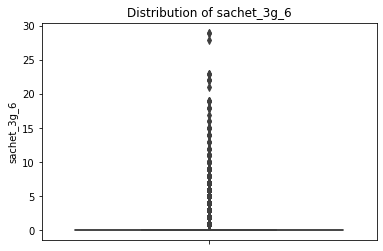

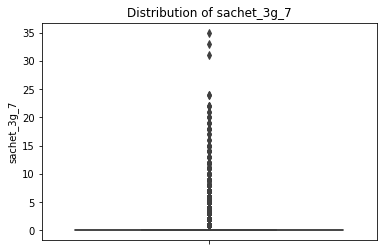

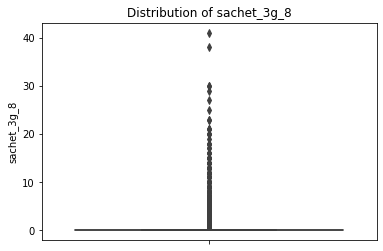

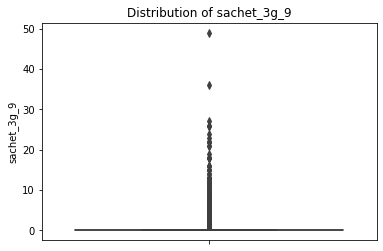

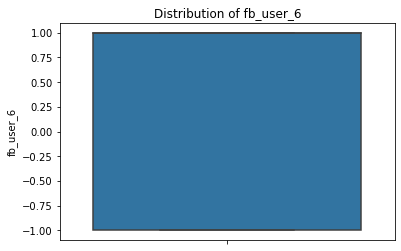

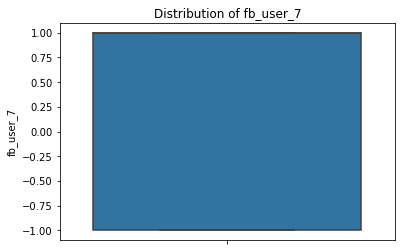

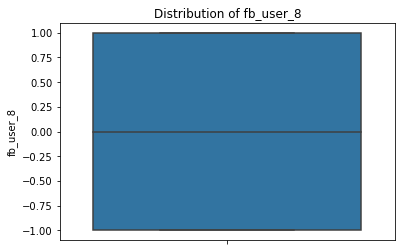

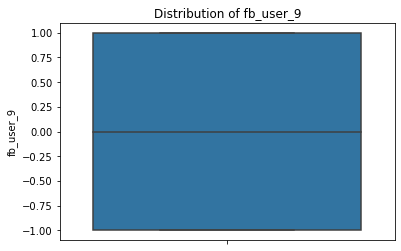

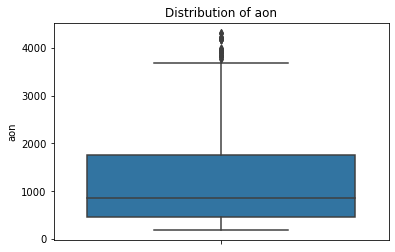

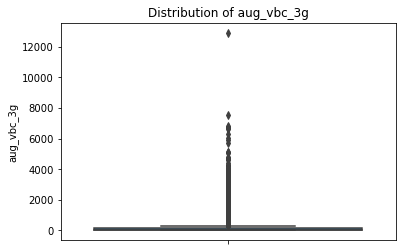

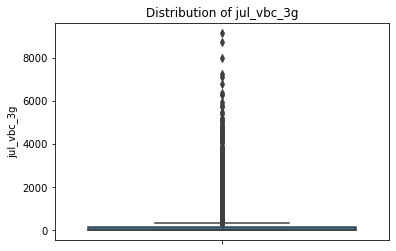

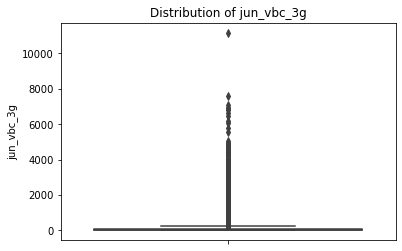

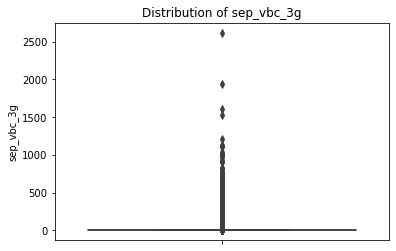

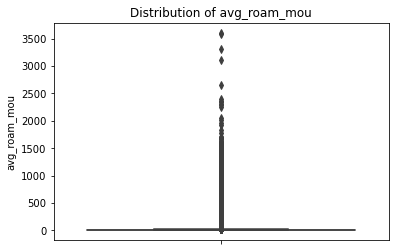

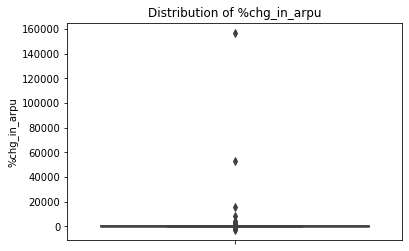

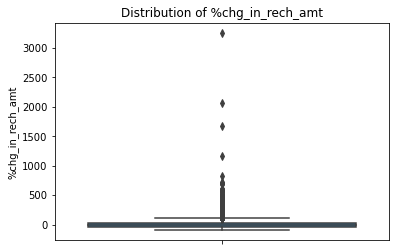

In [47]:
for num_cols in churn_filtered._get_numeric_data():
    plot_box(churn_filtered, num_cols)

## Bivariate Analysis

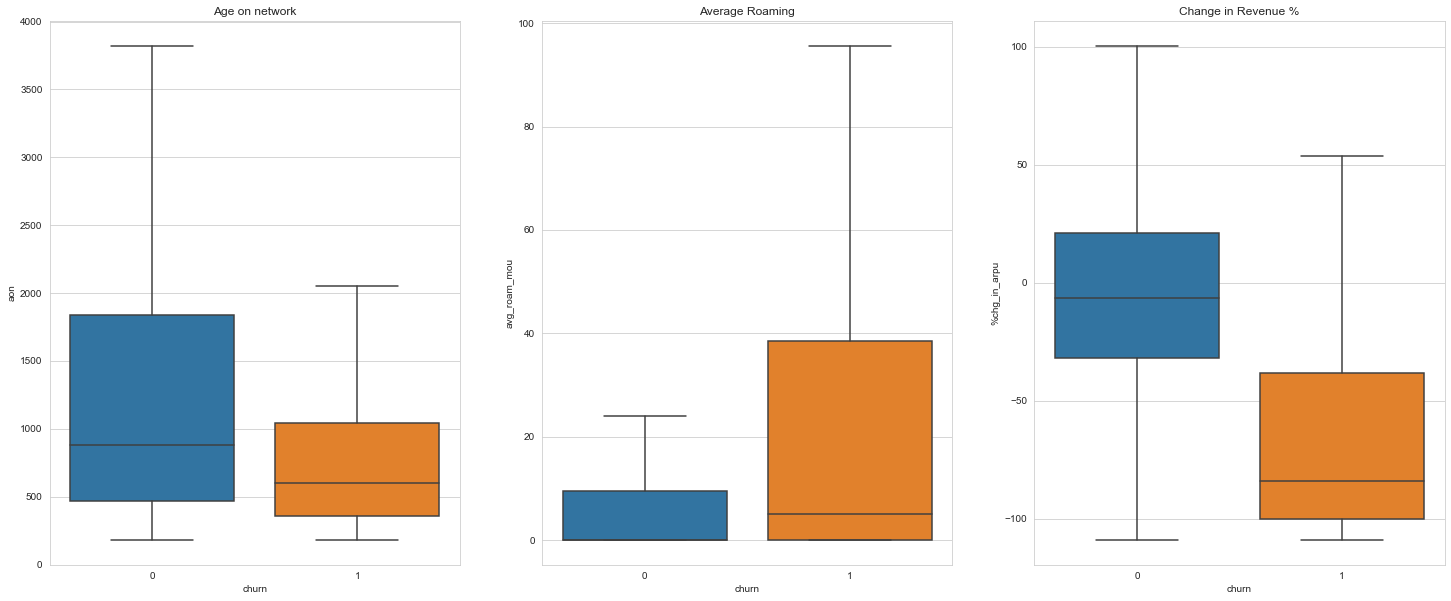

In [177]:
# Bivariate analysis for Churn Vs Age on network, Churn Vs Average Roaming and Churn Vs Change in Revenue %
plt.figure(figsize=(25, 10))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('Age on network')
ax=sns.boxplot(y=churn_filtered.aon,x='churn',data=churn_filtered, showfliers=False)

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Average Roaming')
ax1=sns.boxplot(y=churn_filtered.avg_roam_mou,x='churn',data=churn_filtered, showfliers=False)

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Change in Revenue %')
ax=sns.boxplot(y=churn_filtered['%chg_in_arpu'],x='churn',data=churn_filtered, showfliers=False)

- Longer the user use the network the lesser the tendency they churn
- More the Roaming service used, higher the tendency to churn
- If the revenue generated by the user decreases, they are more likely to churn

In [50]:
#  Churn Vs total_in_std, total_out_std, total_in_isd, total_out_isd and total_data

more_plots=pd.concat([churn_filtered.churn,churn_filtered.loc[:,(churn_filtered.columns.str.contains("vol_2g") |
            churn_filtered.columns.str.contains("vol_3g") | churn_filtered.columns.str.contains("isd_og_mou") | 
            churn_filtered.columns.str.contains("std_og_mou_") | churn_filtered.columns.str.contains("isd_ic_mou") | 
            churn_filtered.columns.str.contains("std_ic_mou_") )]],axis=1)
# more_plots.iloc[:,1:4]
more_plots['total_out_std'] = more_plots.iloc[:,1:4].sum(axis=1)
# more_plots.iloc[:,4:7]
more_plots['total_out_isd'] = more_plots.iloc[:,4:7].sum(axis=1)
# more_plots.iloc[:,7:10]
more_plots['total_in_std'] = more_plots.iloc[:,7:10].sum(axis=1)
# more_plots.iloc[:,10:13]
more_plots['total_in_isd'] = more_plots.iloc[:,10:13].sum(axis=1)
# more_plots.iloc[:,13:19]
more_plots['total_data'] = more_plots.iloc[:,13:19].sum(axis=1)
more_plots.drop(more_plots.columns[1:19],axis=1,inplace=True)
more_plots.describe()

,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,total_out_std,total_out_isd,total_in_std,total_in_isd,total_data
count,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000,29984.000000
mean,105.925657,91.434183,343.383866,369.132020,350.597484,348.690632,1019.866240,276.242533,50.563530,135.182952,295.867974
std,313.453972,282.405176,912.853094,913.660641,917.771459,945.544343,1669.128998,567.557891,158.432147,376.053270,648.857455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.407500,0.300000,1.680000,9.590000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,174.315000,21.310000,12.230000,39.190000,43.075000
75%,51.615000,37.945000,356.987500,409.920000,354.920000,319.517500,1505.220000,301.245000,43.745000,121.635000,291.222500
max,11117.610000,8993.950000,45735.400000,28144.120000,30036.060000,39221.270000,31381.250000,11495.310000,8631.950000,13934.990000,15878.150000


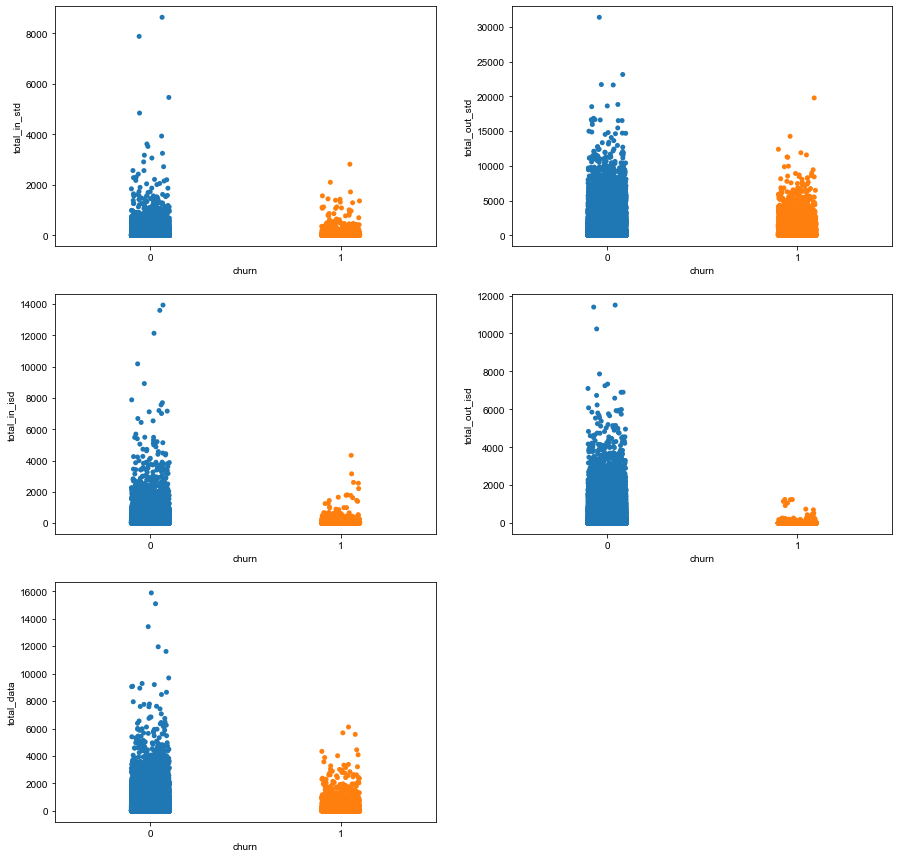

In [51]:
fig, axes = plt.subplots(3,2,figsize=(15,15))
sns.set_style("whitegrid")
sns.stripplot(x="churn", y = "total_in_std", data=more_plots, jitter=True, ax = axes[0,0])
sns.stripplot(x="churn", y = "total_out_std", data=more_plots, jitter=True, ax = axes[0,1])
sns.stripplot(x="churn", y = "total_in_isd", data=more_plots, jitter=True, ax = axes[1,0])
sns.stripplot(x="churn", y = "total_out_isd", data=more_plots, jitter=True, ax = axes[1,1])
sns.stripplot(x="churn", y = "total_data", data=more_plots, jitter=True, ax = axes[2,0])
fig.delaxes(axes[2,1])
plt.show()


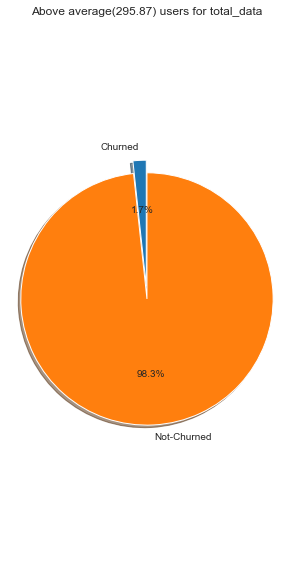

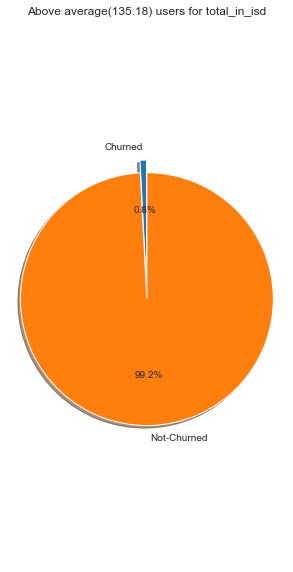

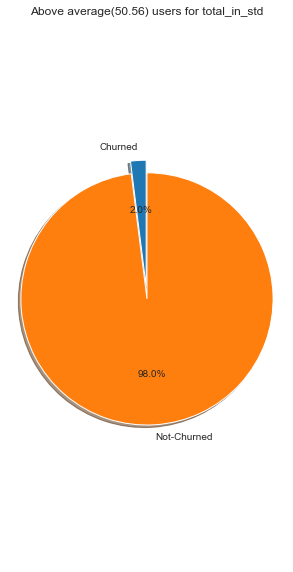

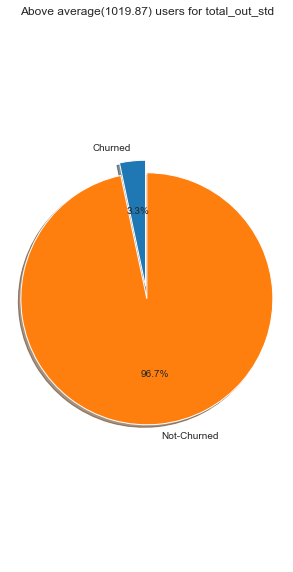

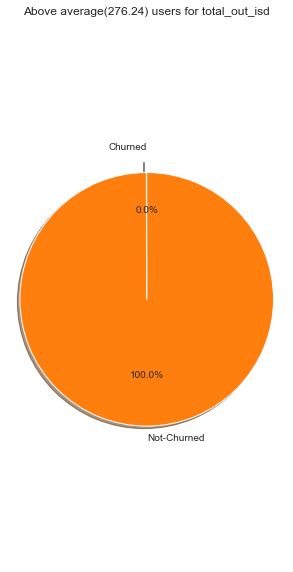

In [52]:
# Churn Vs 'Toal_' columns
col_name = ['total_data','total_in_isd','total_in_std','total_out_std','total_out_isd']
avg_counts = {'total_data':0,'total_in_isd':0,'total_in_std':0,'total_out_std':0,'total_out_isd':0}
churn_counts = {'total_data':0,'total_in_isd':0,'total_in_std':0,'total_out_std':0,'total_out_isd':0}
for i in range(0,5):
    for index, row in more_plots.iterrows():
        if(row[col_name[i]] > more_plots[col_name[i]].mean()):
            avg_counts[col_name[i]] += 1
            if(row['churn'] == 1):
                churn_counts[col_name[i]] += 1
    labels = 'Churned', 'Not-Churned'
    sizes = [churn_counts[col_name[i]], more_plots[col_name[i]].count() - churn_counts[col_name[i]]]
    explode = (0.1, 0.0)
    fig1, ax1 = plt.subplots(figsize=(5,10))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title('Above average(' + str(round(more_plots[col_name[i]].mean(),2)) +') users for '+col_name[i])
    plt.show()

## Delete columns that belong to the churn month (9th month)

In [53]:
# delete all variables relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(29984, 153)

In [54]:
# extract all names that end with 9
col_9_names = churn_data.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

### Cap outliers in all numeric variables with k-sigma technique

In [55]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [56]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

In [57]:
churn_filtered[cat_cols].isnull().sum()*100/churn_filtered.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
churn               0.0
dtype: float64

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [58]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy_1 = pd.get_dummies(churn_filtered[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']],drop_first=True )

# adding the dummy_1 into churn_filtered
churn_filtered = pd.concat([churn_filtered, dummy_1], axis=1)

### Dropping the repeated variables

In [59]:
# We have created dummies for the below variables, so we can drop them
churn_filtered = churn_filtered.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'], 1)

In [60]:
#check the data shape again
churn_filtered.shape

(29984, 147)

In [61]:
# check the data info again
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29984 entries, 0 to 30000
Columns: 147 entries, loc_og_t2o_mou to %chg_in_rech_amt
dtypes: category(1), float64(146)
memory usage: 34.7 MB


## Test-Train split

In [62]:
import sklearn
from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variable to X
X= churn_filtered.drop(['churn'], axis=1)
X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_roam_mou,%chg_in_arpu,%chg_in_rech_amt
0,0.0,0.0,0.0,197.385,214.816,213.803000,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.130000,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.030000,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.890000,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.000000,30.130000,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0,968.0,30.400000,0.00,101.20,3.58,0.000000,3.737254,-17.915309
1,0.0,0.0,0.0,1069.180,1349.850,2014.841639,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.190000,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2418.562727,695.338679,716.486741,679.663936,0.000000,0.000000,527.877731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,802.0,57.740000,19.38,18.74,0.00,51.916667,162.210886,189.951457
2,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,2

In [64]:
# Putting response variable to y
y=churn_filtered['churn']
y

0        1
1        1
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Name: churn, Length: 29984, dtype: category
Categories (2, int64): [0, 1]

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_roam_mou,%chg_in_arpu,%chg_in_rech_amt
10720,0.0,0.0,0.0,251.909,229.726,236.821,12.99,5.01,17.69,39.11,47.81,34.28,0.00,0.00,0.0,0.00,0.00,0.0,3.73,5.01,1.13,14.99,46.310000,31.46,0.000000,0.000000,0.000000,1.81,0.00,0.00,18.73,51.33,32.59,9.26,0.00,16.56,23.68,1.50,0.33,0.0,0.0,0.0,0.0,0.0,0.0,32.94,1.50,16.89,0.00,0.00,0.0,2.24,1.46,4.21,0.00,0.0,0.0,53.93,54.29,53.71,24.73,11.490000,25.19,55.710000,66.410000,38.340000,18.11,17.21,19.88,98.560000,95.130000,83.430000,0.00,0.00,1.70,5.16,0.26,8.33,0.00,0.00,0.00,0.0,0.0,0.0,5.16,0.26,10.03,103.730000,95.39000,93.590000,0.000000,0.0,0.130000,0.00,0.00,0.00,0.00,0.00,0.00,21.0,22.0,19.0,296.0,251.0,269.0,30.0,25.0,30.0,30.000000,25.000000,20.0,7.0,11.0,7.000000,25.000000,25.000000,25.0,167.0,267.0,167.0,14.93,1.62,15.76,433.20,412.57,320.58,0.0,0.000000,0.0,5.0,6.0,4.000000,0.0,0.0,0.0,2.0,3.498087,3.000000,326.0,223.43,70.050000,233.420000,43.00,0.000000,-1.659555,-1.645338
5069,0.0,0.0,0.0,755.128,1306.949,936.931,173.86,475.01,302.51,710.98,1025.09,691.04,0.00,0.00,0.0,0.00,0.00,0.0,172.66,471.46,302.51,553.09,887.386821,608.56,44.090000,5.460000,8.830000,0.00,0.00,0.00,769.86,1368.23,919.91,1.19,3.55,0.00,94.73,128.33,73.64,0.0,0.0,0.0,0.0,0.0,0.0,95.93,131.88,73.64,0.00,0.00,0.0,19.05,0.00,0.00,0.00,0.0,0.0,884.84,1500.11,993.56,80.19,568.973875,382.94,312.910000,480.680000,298.880000,7.68,29.34,46.11,400.790000,1181.246988,727.940000,0.51,3.41,0.00,86.46,119.18,102.03,0.00,0.00,0.00,0.0,0.0,0.0,86.98,122.59,102.03,487.780000,1324.99000,829.980000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,9.0,15.0,9.0,880.0,1560.0,1086.0,110.0,130.0,130.0,110.000000,130.000000,130.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,3132.0,0.00,0.000000,0.000000,0.00,0.000000,-9.127448,-10.983607
24261,0.0,0.0,0.0,769.392,

### Feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
# Scale the data
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [69]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_roam_mou,%chg_in_arpu,%chg_in_rech_amt
0,0.0,0.0,0.0,-0.835450,-0.890356,-0.682222,-0.628053,-0.639070,-0.567522,-0.797202,-0.763581,-0.753023,-0.293033,-0.257192,-0.25966,-0.306463,-0.285850,-0.277949,-0.525461,-0.511424,-0.534370,-0.704804,-0.558053,-0.603823,-0.429244,-0.435285,-0.432627,0.138788,-0.346895,-0.350411,-0.741227,-0.641526,-0.672936,-0.449021,-0.480212,-0.390093,-0.444124,-0.509764,-0.481766,-0.242517,-0.236059,-0.237094,0.0,0.0,0.0,-0.569101,-0.629203,-0.545572,-0.118646,-0.120417,-0.109679,-0.274308,-0.388240,-0.135557,-0.357311,-0.045379,-0.047165,-0.881994,-0.878359,-0.796642,-0.365646,-0.508153,-0.344475,-0.522785,-0.469352,-0.617082,0.173654,0.113291,0.277973,-0.498376,-0.521311,-0.542602,-0.370838,-0.365952,-0.302600,-0.376814,-0.468323,-0.295265,-0.267608,-0.270707,-0.263240,0.0,0.0,0.0,-0.456084,-0.514678,-0.371136,-0.589321,-0.626902,-0.590455,-0.431045,-0.219471,1.452105,-0.246261,-0.254916,-0.254131,-0.209858,-0.217244,-0.217533,1.171620,1.283297,1.143139,-0.822193,-0.899774,-0.657513,-1.013682,-1.044403,-0.962286,-0.632224,-0.674927,-0.644279,2.316092,3.544534,2.276801,-0.513664,-0.526648,-0.464542,0.252056,0.781548,0.310654,-0.402370,-0.457369,-0.354492,0.192068,0.119758,0.002798,-0.417785,-0.426503,-0.396975,1.946535,2.100397,1.463763,-0.403428,-0.402020,-0.388012,3.430555,5.678226,5.127654,-0.926109,0.216673,-0.269984,0.292923,1.553362,-0.367532,0.034178,0.127348
1,0.0,0.0,0.0,0.585269,2.100055,1.134776,-0.194852,0.569509,0.233878,0.867576,1.593204,0.949171,-0.293033,-0.257192,-0.25966,-0.306463,-0.285850,-0.277949,0.742227,2.947491,1.867657,1.998997,3.729473,2.443792,2.987870,-0.010931,0.305953,-0.353367,-0.346895,-0.350411,1.750295,3.768660,2.407850,-0.474465,-0.469624,-0.445403,-0.218691,-0.128993,-0.232337,-0.242517,-0.236059,-0.237094,0.0,0.0,0.0,-0.449557,-0.393522,-0.432731,-0.118646,-0.120417,-0.109679,1.319329,-0.505052,-0.49

In [70]:
X_test

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_roam_mou,%chg_in_arpu,%chg_in_rech_amt
0,0.0,0.0,0.0,0.527663,1.003976,0.930019,0.964478,0.692810,0.608241,1.092835,0.867802,0.453592,-0.293033,-0.257192,-0.259660,-0.306463,-0.285850,-0.277949,3.981949,3.329384,2.928078,2.945654,2.766490,1.591294,0.203182,-0.055232,0.741740,-0.282671,-0.346895,-0.350411,3.688039,3.293483,2.327403,-0.478217,-0.480212,-0.445403,-0.385489,-0.451491,-0.351386,1.649290,-0.236059,-0.237094,0.0,0.0,0.0,-0.533005,-0.594116,-0.502305,-0.118646,-0.120417,-0.109679,-0.462018,-0.505052,0.091607,-0.357311,-0.045379,-0.047165,1.317837,0.994125,0.670969,0.324301,-0.004114,0.765996,0.968611,2.626786,0.897009,0.925190,0.280580,1.703734,0.853333,1.765024,1.041429,-0.370838,-0.365952,-0.355930,-0.441008,-0.157156,-0.269380,-0.267608,-0.270707,0.838198,0.0,0.0,0.0,-0.499380,-0.306340,-0.266978,0.533137,1.317596,0.749518,-0.431045,-0.219471,-0.277121,-0.246261,-0.254916,-0.254131,-0.209858,-0.217244,-0.217533,0.054085,0.189791,0.402868,0.548458,0.904679,1.055214,-0.400705,0.659355,0.764132,-0.603342,-0.598665,1.547307,0.182523,0.473129,0.196999,-0.513664,1.765132,1.873789,-0.458610,0.986942,1.726687,-0.089912,-0.230462,-0.170468,-0.473009,1.142614,0.176767,-0.417785,-0.426503,-0.396975,0.496860,0.374461,-0.466645,-0.403428,1.532032,3.675395,-0.303456,-0.292008,-0.266345,1.973329,0.820244,0.774479,-0.456992,-0.228328,-0.367532,0.104429,0.342726
1,0.0,0.0,0.0,0.985901,-0.124672,0.813114,1.351308,0.143601,0.975852,1.348596,0.563389,1.043357,-0.293033,-0.257192,0.623692,-0.306463,-0.285850,0.019117,5.059931,1.745603,3.897241,3.756996,2.248312,2.934653,-0.429244,-0.361451,0.812001,0.231237,-0.346895,-0.350411,3.802427,2.224576,3.635727,-0.478217,-0.480212,-0.445403,-0.519257,-0.513427,-0.482889,-0.242517,-0.236059,-0.237094,0.0,0.0,0.0,-0.631615,-0.631408,-0.579156,-0.118646,-0.120417,-0.109679,-0.282840,-0.505052,-0.142415,-0.357311,-0.005509,-0.047165,1.7

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
# Balancing using SMOTE to handle imbalanced dataset
smote = SMOTE(random_state=4)
X_train_s,y_train_s=smote.fit_sample(X_train, y_train)
X_train_s = pd.DataFrame(data=X_train_s,columns=X.columns)

##  Logistic Regression Model Building with RFE

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [75]:
# Perform RFE for Logistic regression 
logreg = LogisticRegression()
start=time.time()
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train_s, y_train_s)
print(rfe.support_)           
print(rfe.ranking_)           
print(time.time()-start , 'seconds to run')

[False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False  True False False  True
 False False  True False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False  True False  True  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False]
[132 131 130 108  31  12  80   3  37  67   2  32  68  58  57 114  59  33
  49 100   1 109  46   1 113  19  93 

In [76]:
cols_rfe=X_train.columns[rfe.support_]
cols_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_data_8',
       'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

#### Assessing the model with StatsModels

In [77]:
import statsmodels.api as sm

In [78]:
X_train_sm = sm.add_constant(X_train_s[cols_rfe])
logm1 = sm.GLS(y_train_s, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.406
Model:                            GLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1757.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:25:49   Log-Likelihood:                -17972.
No. Observations:               38606   AIC:                         3.598e+04
Df Residuals:                   38590   BIC:                         3.611e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3284      0.002    147.325      0.000       0.324       0.333
loc_og_t2t_mou_8     -0.1005      0.008    -12.548      0.000      -0.116      -0.085
loc_og_t2m_mou_8     -0.1847      0.011    -16.456      0.000      -0.207      -0.163
loc_og_mou_8          0.2778      0.019     14.691      0.000       0.241       0.315
std_og_t2t_mou_8     -0.1432      0.009    -15.388      0.000      -0.161      -0.125
std_og_t2m_mou_8     -0.1411      0.009    -15.506      0.000      -0.159      -0.123
std_og_mou_8          0.3754      0.021     17.492      0.000       0.333       0.417
total_og_mou_8       -0.2851      0.017    -17.231      0.000      -0.318      -0.253
loc_ic_mou_8          0.2183      0.010     21.943      0.000       0.199       0.238
std_ic_mou_8          0.0877      0.004     19.493      0.000       0.079       0.096
total_ic_mou_7        0.0778      0.004     21.614      0.000       0.071       0.085
total_ic_mou_8       -0.4496      0.011    -39.667      0.000      -0.472      -0.427
isd_ic_mou_8          0.0477      0.003     16.230      0.000       0.042       0.053
total_rech_data_8    -0.1332      0.003    -52.018      0.000      -0.138      -0.128
max_rech_data_8      -0.1121      0.002    -46.397      0.000      -0.117      -0.107
sep_vbc_3g           -0.0356      0.003    -13.303      0.000      -0.041      -0.030
==============================================================================
Omnibus:                      715.954   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.637
Skew:                          -0.068   Prob(JB):                     6.78e-90
Kurtosis:                       2.513   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_s[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_s[cols_rfe].values, i) for i in range(X_train_s[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_8,95.49
2,loc_og_mou_8,69.43
6,total_og_mou_8,63.81
10,total_ic_mou_8,28.18
1,loc_og_t2m_mou_8,24.14
7,loc_ic_mou_8,19.34
3,std_og_t2t_mou_8,17.88
4,std_og_t2m_mou_8,16.45
0,loc_og_t2t_mou_8,11.35
8,std_ic_mou_8,3.53


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'std_og_mou_8' has the highest VIF. So let's start by dropping that.



In [81]:
# Drop std_og_mou_8
cols_rfe = cols_rfe.drop('std_og_mou_8', 1)
cols_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_data_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [82]:
# 2nd model
X_train_sm = sm.add_constant(X_train_s[cols_rfe])
logm2 = sm.GLS(y_train_s, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.401
Model:                            GLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1846.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:26:31   Log-Likelihood:                -18124.
No. Observations:               38606   AIC:                         3.628e+04
Df Residuals:                   38591   BIC:                         3.641e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3303      0.002    147.817      0.000       0.326       0.335
loc_og_t2t_mou_8     -0.0918      0.008    -11.439      0.000      -0.107      -0.076
loc_og_t2m_mou_8     -0.1599      0.011    -14.306      0.000      -0.182      -0.138
loc_og_mou_8          0.1311      0.017      7.707      0.000       0.098       0.164
std_og_t2t_mou_8     -0.0252      0.006     -3.909      0.000      -0.038      -0.013
std_og_t2m_mou_8     -0.0252      0.006     -4.029      0.000      -0.038      -0.013
total_og_mou_8       -0.0633      0.011     -5.931      0.000      -0.084      -0.042
loc_ic_mou_8          0.2508      0.010     25.563      0.000       0.232       0.270
std_ic_mou_8          0.0978      0.004     21.839      0.000       0.089       0.107
total_ic_mou_7        0.0772      0.004     21.366      0.000       0.070       0.084
total_ic_mou_8       -0.4853      0.011    -43.352      0.000      -0.507      -0.463
isd_ic_mou_8          0.0510      0.003     17.329      0.000       0.045       0.057
total_rech_data_8    -0.1354      0.003    -52.762      0.000      -0.140      -0.130
max_rech_data_8      -0.1120      0.002    -46.188      0.000      -0.117      -0.107
sep_vbc_3g           -0.0360      0.003    -13.417      0.000      -0.041      -0.031
==============================================================================
Omnibus:                      636.375   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.029
Skew:                          -0.078   Prob(JB):                     6.70e-84
Kurtosis:                       2.538   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### check the VIF again

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_s[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_s[cols_rfe].values, i) for i in range(X_train_s[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,55.85
9,total_ic_mou_8,27.19
5,total_og_mou_8,26.39
1,loc_og_t2m_mou_8,23.77
6,loc_ic_mou_8,18.64
0,loc_og_t2t_mou_8,11.31
3,std_og_t2t_mou_8,8.49
4,std_og_t2m_mou_8,7.75
7,std_ic_mou_8,3.47
8,total_ic_mou_7,2.81


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'loc_og_mou_8' has the highest VIF. So let's start by dropping that.


In [84]:
# Drop loc_og_mou_8
cols_rfe = cols_rfe.drop('loc_og_mou_8', 1)
cols_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_data_8',
       'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [85]:
# 3rd model
X_train_sm = sm.add_constant(X_train_s[cols_rfe])
logm3 = sm.GLS(y_train_s, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.400
Model:                            GLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     1981.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:26:55   Log-Likelihood:                -18154.
No. Observations:               38606   AIC:                         3.634e+04
Df Residuals:                   38592   BIC:                         3.646e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3307      0.002    147.917      0.000       0.326       0.335
loc_og_t2t_mou_8     -0.0378      0.004     -9.658      0.000      -0.045      -0.030
loc_og_t2m_mou_8     -0.0814      0.005    -17.738      0.000      -0.090      -0.072
std_og_t2t_mou_8     -0.0458      0.006     -7.835      0.000      -0.057      -0.034
std_og_t2m_mou_8     -0.0455      0.006     -7.997      0.000      -0.057      -0.034
total_og_mou_8       -0.0276      0.010     -2.872      0.004      -0.046      -0.009
loc_ic_mou_8          0.2566      0.010     26.212      0.000       0.237       0.276
std_ic_mou_8          0.1006      0.004     22.529      0.000       0.092       0.109
total_ic_mou_7        0.0769      0.004     21.286      0.000       0.070       0.084
total_ic_mou_8       -0.4929      0.011    -44.177      0.000      -0.515      -0.471
isd_ic_mou_8          0.0524      0.003     17.810      0.000       0.047       0.058
total_rech_data_8    -0.1362      0.003    -53.064      0.000      -0.141      -0.131
max_rech_data_8      -0.1122      0.002    -46.222      0.000      -0.117      -0.107
sep_vbc_3g           -0.0362      0.003    -13.448      0.000      -0.041      -0.031
==============================================================================
Omnibus:                      617.958   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.704
Skew:                          -0.079   Prob(JB):                     2.61e-82
Kurtosis:                       2.544   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### check the VIF again

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_s[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_s[cols_rfe].values, i) for i in range(X_train_s[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,26.96
4,total_og_mou_8,21.43
5,loc_ic_mou_8,18.53
2,std_og_t2t_mou_8,7.01
3,std_og_t2m_mou_8,6.38
1,loc_og_t2m_mou_8,3.99
6,std_ic_mou_8,3.45
7,total_ic_mou_7,2.81
0,loc_og_t2t_mou_8,2.68
9,isd_ic_mou_8,1.55


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_ic_mou_8' has the highest VIF. So let's start by dropping that.


In [87]:
# Drop total_ic_mou_8
cols_rfe = cols_rfe.drop('total_ic_mou_8', 1)
cols_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'isd_ic_mou_8', 'total_rech_data_8',
       'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [88]:
# 4th model
X_train_sm = sm.add_constant(X_train_s[cols_rfe])
logm4 = sm.GLS(y_train_s, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.370
Model:                            GLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1888.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:27:22   Log-Likelihood:                -19106.
No. Observations:               38606   AIC:                         3.824e+04
Df Residuals:                   38593   BIC:                         3.835e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3434      0.002    151.128      0.000       0.339       0.348
loc_og_t2t_mou_8     -0.0302      0.004     -7.551      0.000      -0.038      -0.022
loc_og_t2m_mou_8     -0.0716      0.005    -15.256      0.000      -0.081      -0.062
std_og_t2t_mou_8     -0.0347      0.006     -5.785      0.000      -0.046      -0.023
std_og_t2m_mou_8     -0.0341      0.006     -5.848      0.000      -0.045      -0.023
total_og_mou_8       -0.0663      0.010     -6.749      0.000      -0.086      -0.047
loc_ic_mou_8         -0.1347      0.004    -31.483      0.000      -0.143      -0.126
std_ic_mou_8         -0.0520      0.003    -17.903      0.000      -0.058      -0.046
total_ic_mou_7        0.0390      0.004     10.839      0.000       0.032       0.046
isd_ic_mou_8         -0.0189      0.003     -7.500      0.000      -0.024      -0.014
total_rech_data_8    -0.1499      0.003    -57.392      0.000      -0.155      -0.145
max_rech_data_8      -0.1185      0.002    -47.708      0.000      -0.123      -0.114
sep_vbc_3g           -0.0388      0.003    -14.090      0.000      -0.044      -0.033
==============================================================================
Omnibus:                     2681.951   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.680
Skew:                          -0.207   Prob(JB):                    2.73e-249
Kurtosis:                       2.265   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### check the VIF again

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_s[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_s[cols_rfe].values, i) for i in range(X_train_s[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,21.25
2,std_og_t2t_mou_8,7.00
3,std_og_t2m_mou_8,6.37
1,loc_og_t2m_mou_8,3.98
5,loc_ic_mou_8,3.36
0,loc_og_t2t_mou_8,2.68
7,total_ic_mou_7,2.66
6,std_ic_mou_8,1.39
10,max_rech_data_8,1.24
9,total_rech_data_8,1.17


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_og_mou_8' has the highest VIF. So let's start by dropping that.


In [90]:
# Drop total_og_mou_8
cols_rfe = cols_rfe.drop('total_og_mou_8', 1)
cols_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'isd_ic_mou_8', 'total_rech_data_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [91]:
# 5th model
X_train_sm = sm.add_constant(X_train_s[cols_rfe])
logm5 = sm.GLS(y_train_s, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.369
Model:                            GLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     2053.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:27:47   Log-Likelihood:                -19129.
No. Observations:               38606   AIC:                         3.828e+04
Df Residuals:                   38594   BIC:                         3.838e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3438      0.002    151.225      0.000       0.339       0.348
loc_og_t2t_mou_8     -0.0487      0.003    -16.693      0.000      -0.054      -0.043
loc_og_t2m_mou_8     -0.0943      0.003    -28.682      0.000      -0.101      -0.088
std_og_t2t_mou_8     -0.0718      0.002    -30.109      0.000      -0.076      -0.067
std_og_t2m_mou_8     -0.0697      0.002    -28.130      0.000      -0.075      -0.065
loc_ic_mou_8         -0.1338      0.004    -31.272      0.000      -0.142      -0.125
std_ic_mou_8         -0.0514      0.003    -17.706      0.000      -0.057      -0.046
total_ic_mou_7        0.0385      0.004     10.706      0.000       0.031       0.046
isd_ic_mou_8         -0.0195      0.003     -7.755      0.000      -0.024      -0.015
total_rech_data_8    -0.1505      0.003    -57.633      0.000      -0.156      -0.145
max_rech_data_8      -0.1189      0.002    -47.842      0.000      -0.124      -0.114
sep_vbc_3g           -0.0389      0.003    -14.106      0.000      -0.044      -0.033
==============================================================================
Omnibus:                     2763.376   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.745
Skew:                          -0.210   Prob(JB):                    2.68e-254
Kurtosis:                       2.258   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### check the VIF again

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_s[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_s[cols_rfe].values, i) for i in range(X_train_s[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,3.35
6,total_ic_mou_7,2.65
1,loc_og_t2m_mou_8,1.94
0,loc_og_t2t_mou_8,1.42
5,std_ic_mou_8,1.39
9,max_rech_data_8,1.23
8,total_rech_data_8,1.17
3,std_og_t2m_mou_8,1.14
2,std_og_t2t_mou_8,1.10
7,isd_ic_mou_8,1.09


The P value and VIF is in control. So, Let us now baseline this and proceed with Modelling

### Logistic Regression Model Evaluation

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [94]:
# LR without hyperparameter tunning
log_updated= LogisticRegression()
log_updated.fit(X_train_s[cols_rfe], (y_train_s))
predictions = log_updated.predict(X_test[cols_rfe])
probas=log_updated.predict_proba(X_test[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      8242
           1       0.24      0.80      0.36       754

    accuracy                           0.77      8996
   macro avg       0.61      0.78      0.61      8996
weighted avg       0.91      0.77      0.82      8996

[[6297 1945]
 [ 152  602]]
Accuracy-> 0.7668963983992886
AUC-> 0.8608497139256329


#### Logistic Regression with hyperparameter tunning using Recall and F1 score for evaluation


In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [97]:
weights = np.linspace(0.05, 0.95, 10)
parameters = {'class_weight': [{0: x, 1: 1.0-x} for x in weights]}

log1 = LogisticRegression()

cv1= GridSearchCV(log1, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)
cv1.fit(X_train_s[cols_rfe], y_train_s)

log_updated= LogisticRegression(class_weight= cv1.best_params_['class_weight'])
log_updated.fit(X_train_s[cols_rfe], (y_train_s))
predictions = log_updated.predict(X_test[cols_rfe])
probas=log_updated.predict_proba(X_test[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.2s finished


              precision    recall  f1-score   support

           0       0.99      0.21      0.34      8242
           1       0.10      0.98      0.18       754

    accuracy                           0.27      8996
   macro avg       0.55      0.60      0.26      8996
weighted avg       0.92      0.27      0.33      8996

[[1701 6541]
 [  12  742]]
Accuracy-> 0.2715651400622499
AUC-> 0.860155205562246


### Evaluation Metric - F1

In [99]:
weights = np.linspace(0.05, 0.95, 10)
parameters = {'class_weight': [{0: x, 1: 1.0-x} for x in weights]}

log1 = LogisticRegression()

cv1= GridSearchCV(log1, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)
cv1.fit(X_train_s[cols_rfe], y_train_s)

log_updated= LogisticRegression(class_weight= cv1.best_params_['class_weight'])
log_updated.fit(X_train_s[cols_rfe], (y_train_s))
predictions = log_updated.predict(X_test[cols_rfe])
probas=log_updated.predict_proba(X_test[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8242
           1       0.26      0.79      0.39       754

    accuracy                           0.80      8996
   macro avg       0.62      0.79      0.64      8996
weighted avg       0.92      0.80      0.84      8996

[[6585 1657]
 [ 161  593]]
Accuracy-> 0.7979101823032458
AUC-> 0.8607678082822213


## Logistic Regression Model Inference

### Variables are significant in predicting the customer churn

#### Significant variables, in the order, using Logistic regression are:
1. total_rech_data_8
2. loc_ic_mou_8
3. max_rech_data_8
4. loc_og_t2m_mou_8
5. std_og_t2t_mou_8
6. std_og_t2m_mou_8
7. std_ic_mou_8
8. loc_og_t2t_mou_8
9. sep_vbc_3g
10. total_ic_mou_7
11. isd_ic_mou_8


#### Inferences: 
- `Total_rech_data_8` has a significant negetive corellation to churning, i.e. a customer who's total data recharge in the 8th months is on the higher side is unlikely to Churn.
- `loc_ic_mou_8` has a significant negetive corellation to churning, i.e. a customer who is having high incomming calls in the 8th month is unlikely to Churn.
- `loc_og_t2m_mou_8`, `std_og_t2t_mou_8`, `std_og_t2m_mou_8` and `loc_og_t2t_mou_8` are negetively correlated to the Churning probability. In general, we can say that if a customer has high usage of outgoing call (Local or STD, t2t or t2m), the customer is unlikely to Churn 



### PCA on the data

In [100]:
X_train_s.shape

(38606, 146)

In [101]:
from sklearn.decomposition import PCA

In [102]:
# Create instance for PCA
pca = PCA(0.9, random_state=42)

In [103]:
pca.fit(X_train_s)

PCA(n_components=0.9, random_state=42)

In [104]:
pca.components_

array([[-4.46601540e-19, -2.77555756e-16, -3.33066907e-16, ...,
         4.92158530e-02,  4.21606062e-02,  6.31177432e-02],
       [ 5.64237078e-20,  6.93889390e-18,  6.93889390e-17, ...,
        -4.70466410e-02,  8.37027780e-02,  1.19940433e-01],
       [-2.61662899e-19, -2.77555756e-17,  1.11022302e-16, ...,
         3.20003203e-01,  7.37024907e-02,  8.64896063e-02],
       ...,
       [-1.95539856e-19, -2.08166817e-17,  1.37910516e-16, ...,
        -1.46316833e-02, -1.20526105e-01, -2.71814145e-02],
       [ 5.69990270e-19,  5.55111512e-17,  4.85722573e-17, ...,
         1.12709752e-03, -1.65150902e-04,  3.53717295e-02],
       [-2.00856429e-18, -6.93889390e-17,  1.24900090e-16, ...,
         1.02099883e-02, -4.54784283e-02, -7.37783450e-02]])

In [105]:
pca.explained_variance_ratio_

array([0.12288389, 0.10838292, 0.0628695 , 0.0559332 , 0.04544436,
       0.03778935, 0.03570538, 0.03347436, 0.02568542, 0.01908833,
       0.01857549, 0.01822222, 0.01730392, 0.01630332, 0.01533764,
       0.0150102 , 0.01332037, 0.01275232, 0.01194686, 0.0117222 ,
       0.01088184, 0.00957951, 0.0094215 , 0.00886185, 0.00876116,
       0.00861201, 0.00845483, 0.0082118 , 0.00747747, 0.00732016,
       0.00697945, 0.00689126, 0.00676022, 0.00641409, 0.00613426,
       0.00598486, 0.00581969, 0.00575192, 0.00566995, 0.00552377,
       0.0053404 , 0.00514325, 0.00506417, 0.004505  , 0.00450082,
       0.00434792, 0.00432616, 0.00417232, 0.00410148, 0.00394794,
       0.00389733, 0.00381014])

In [106]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

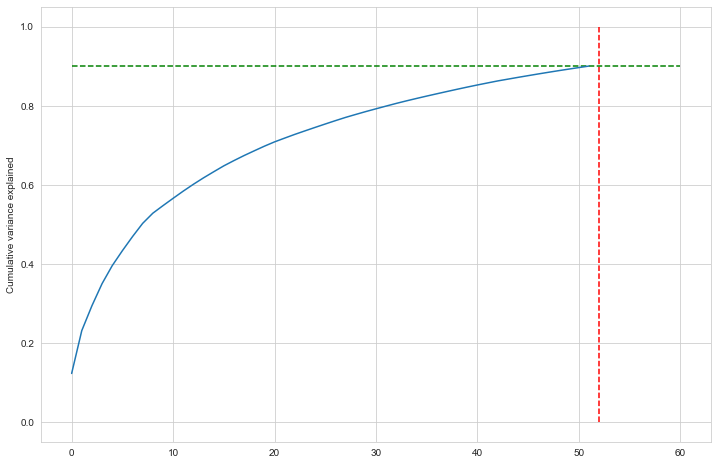

In [108]:
# Plot the scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=52, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [109]:
# Transform and save the train data
churn_train_pca = pca.fit_transform(X_train_s)

In [110]:
# Check the shape
churn_train_pca.shape

(38606, 52)

### Logistic Regression with PCA

In [111]:
# Create Logistic regression instance
logreg_pca_smote = LogisticRegression()

In [113]:
# Fit logistic regression model on PCs
model_pca_smote = logreg_pca_smote.fit(churn_train_pca, y_train_s)

In [114]:
# Transform the test data
churn_test_pca = pca.transform(X_test)

In [115]:
# Check shape
churn_test_pca.shape

(8996, 52)

In [117]:
# Predict probability
pred_probs_test = model_pca_smote.predict_proba(churn_test_pca)[:,1]

In [118]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [119]:
print(confusion_matrix(y_test,predictions))

[[6585 1657]
 [ 161  593]]


In [121]:
# Hyperparameter tuning for the logistic regression on PCs
weights = np.linspace(0.05, 0.95, 56)
parameters = {'class_weight': [{0: x, 1: 1.0-x} for x in weights]}



cv2= GridSearchCV(logreg_pca_smote, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)
cv2.fit(churn_train_pca, y_train_s)

log_updated2= LogisticRegression(class_weight= cv2.best_params_['class_weight'])
log_updated2.fit(churn_train_pca, (y_train_s))
predictions2 = log_updated2.predict(churn_test_pca)
probas2=log_updated2.predict_proba(churn_test_pca)
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))
print("Accuracy->" ,accuracy_score(y_test,predictions2))
print("AUC->",metrics.roc_auc_score(y_test,probas2[:, 1]))

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   56.6s finished


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8242
           1       0.29      0.82      0.43       754

    accuracy                           0.82      8996
   macro avg       0.64      0.82      0.66      8996
weighted avg       0.92      0.82      0.85      8996

[[6762 1480]
 [ 139  615]]
Accuracy-> 0.8200311249444198
AUC-> 0.8904894192069216


### Decision Tree Model using Principal Components

In [122]:
# Creat Decision Tree instance
from sklearn.tree import DecisionTreeClassifier
dtree_pca = DecisionTreeClassifier(max_depth=5)
dtree_pca.fit(churn_train_pca, y_train_s)

DecisionTreeClassifier(max_depth=5)

In [123]:
# Predict
dtree_y_predfinal_pca = dtree_pca.predict(churn_test_pca)

In [124]:
print(classification_report(y_test,dtree_y_predfinal_pca))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8242
           1       0.26      0.71      0.38       754

    accuracy                           0.80      8996
   macro avg       0.61      0.76      0.63      8996
weighted avg       0.91      0.80      0.84      8996



In [125]:
#Optimising dtree params according to PCA
nfolds=5
params_grid = {'max_depth':range(5,20,5),
               'min_samples_leaf': range(25,200,50),
               'min_samples_split': range(25,200,50),
               'criterion':['gini','entropy']}
dtree_grid_pca = DecisionTreeClassifier()
grid_model_pca = GridSearchCV(dtree_grid_pca,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model_pca.fit(churn_train_pca,y_train_s)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(25, 200, 50),
                         'min_samples_split': range(25, 200, 50)})

In [126]:
grid_model_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [128]:
# Use the optimum parameters from best_params_ 
dtree_optimal = DecisionTreeClassifier(max_depth=15,min_samples_leaf=25, min_samples_split=25,criterion='entropy')
dtree_optimal.fit(churn_train_pca,y_train_s)
y_pred_ftree_opt = dtree_optimal.predict(churn_test_pca)

In [129]:
print(classification_report(y_test,y_pred_ftree_opt))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      8242
           1       0.28      0.62      0.38       754

    accuracy                           0.83      8996
   macro avg       0.62      0.73      0.64      8996
weighted avg       0.90      0.83      0.86      8996



## RandomForest Model using Principal Components

In [130]:
# Create Random forest instance
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier()
rf_pca.fit(churn_train_pca,y_train_s)

RandomForestClassifier()

In [131]:
# Predict
y_pred_rf_pca = rf_pca.predict(churn_test_pca)
print(classification_report(y_test,y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8242
           1       0.46      0.51      0.49       754

    accuracy                           0.91      8996
   macro avg       0.71      0.73      0.72      8996
weighted avg       0.91      0.91      0.91      8996



In [132]:
#Optimising with gridsearchcv
n_folds=5
params_grid={
     'max_depth': range(2,20,5),
     'min_samples_leaf': range(100, 400, 200),
     'min_samples_split': range(200, 500, 200),
     'n_estimators': [100,200, 300], 
     'max_features': [5, 10]
 }

rf_grid_pca = RandomForestClassifier()
grid_rf_model_pca = GridSearchCV(rf_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model_pca.fit(churn_train_pca,y_train_s)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 48.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [133]:
grid_rf_model_pca.best_params_

{'max_depth': 17,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [134]:
# Use the optimum parameters from best_params_ 
rf_opt_pca=RandomForestClassifier(max_depth=17, max_features=10,min_samples_leaf=100, min_samples_split=200, n_estimators=300)
rf_opt_pca.fit(churn_train_pca,y_train_s)
y_pred_final_rf_opt = rf_opt_pca.predict(churn_test_pca)

In [135]:
print(classification_report(y_test,y_pred_final_rf_opt))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8242
           1       0.34      0.71      0.46       754

    accuracy                           0.86      8996
   macro avg       0.66      0.79      0.69      8996
weighted avg       0.92      0.86      0.88      8996



In [136]:
rf_opt_pca.feature_importances_.shape

(52,)

In [137]:
from sklearn.metrics import roc_curve
proba = rf_opt_pca.predict_proba(churn_test_pca)
preds = proba[:,1]

In [138]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [139]:
roc_auc = metrics.auc(fpr, tpr)

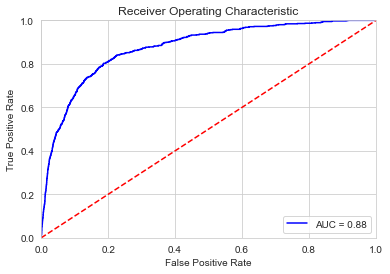

In [140]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary of Models

### Comparison with different models

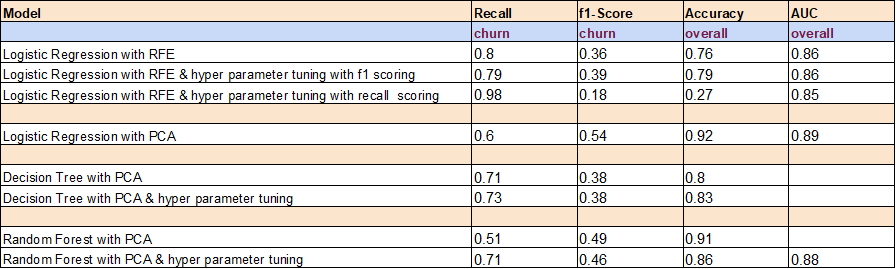